In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as DT
import io
from datetime import datetime, date 
from sklearn import metrics, preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,classification_report, jaccard_score, log_loss, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from scipy import stats
import time
import itertools
import statsmodels.api as sm
from sklearn.impute import KNNImputer

## 1. Downloading data and creating dataframes:
    - train.json and train.csv will be merged, same as test.json and test.csv
    
## 2. Preparing data:
    - checking how data look like, statistics, description
    - adding additional columns to dtaframes: 
        -Age (calculated based on DOB), 
        -Location_type, Location_from_type (creating bins for different size of locations), 
        -Groups (showing in how many groups is each user),
        -Seperating Hobby to different columns
    -handling missing data by dealting rows, filling missing data with mean/ median/ most frequent values 
    -delateing rows with oulier values
    
## 3. Data visualizastion, summary
    - visizalizastion of data
    - analysis of correlation
    - Splitting hobby column/ dummy data
    
## 4. Model building
    - preparing data sets - train and test dataframes
    
## 5. a) Logistic Regression
    - buidling ligistic regression model
    - creating confusion matrix
    - evaluation of model - checking accuracy, recall, f1, log loss
    - 
   ## b) Making predictions on test dataframe using LR model
    - predicting target for users from test data set

## 6. a) Building Classification Decision Trees Classifier model
    - buidling decision tree model
    - creating confusion matrix
    - evaluation of model - checking accuracy, recall, f1, log loss
    
   ## b) Making predictions on test dataframe using Decision Tree model
    - predicting target for users from test data set
    
## 7. Summary

# Downloading and opening files

In [387]:
with open(r'C:\Users\kasia\OneDrive\Pulpit\udemy\Github\Accenture\train.json', encoding="utf8") as f:

   data = json.load(f)


In [388]:
with open(r'C:\Users\kasia\OneDrive\Pulpit\udemy\Github\Accenture\test.json', encoding="utf8") as f:

   data2 = json.load(f)


In [389]:
def flatten_json(nested_json, exclude=['']):
    """Flatten json object with nested keys into a single level.
        Args:
            nested_json: A nested json object.
            exclude: Keys to exclude from output.
        Returns:
            The flattened json object if successful, None otherwise.
    """
    out = {}

    def flatten(x, name='', exclude=exclude):
        if type(x) is dict:
            for a in x:
                if a not in exclude: flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(nested_json)
    return out

In [390]:
train_j = pd.DataFrame([flatten_json(x) for x in data['data']])
test_j = pd.DataFrame([flatten_json(x) for x in data2['data']])

In [391]:
train_j.head()

,groups_data_0_group_name,groups_data_0_date_joined,groups_data_1_group_name,groups_data_1_date_joined,groups_data_2_group_name,groups_data_2_date_joined,groups_data_3_group_name,groups_data_3_date_joined,id,groups_data_4_group_name,...,groups_data_6_group_name,groups_data_6_date_joined,groups_data_7_group_name,groups_data_7_date_joined,groups_data_8_group_name,groups_data_8_date_joined,groups_data_9_group_name,groups_data_9_date_joined,groups_data_10_group_name,groups_data_10_date_joined
0,Let's excercise together and lose a few kilo q...,2008-09-05 09:55:18.730066,Strongman competition,2008-05-22 21:25:22.572365,Fast food 4 life,2012-02-02 05:26:01.293628,alternative medicine - Hypnosis and bioenergot...,2008-07-05 05:47:12.254848,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tom Cruise group,2009-06-14 16:48:28.606142,Babysitters (Sokółka),2010-09-25 03:21:01.944684,Work abroad - join to find well paid work and ...,2010-09-21 23:44:39.499240,"Tennis, Squash, Badminton, table tennis - look...",2007-10-09 17:15:13.896508,1,Lost&Found (Sokółka),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Polish wildlife - best places,2007-07-29 18:15:49.603727,Politics and politicians,2010-10-03 21:00:27.154597,Pizza ! Best recipes,2010-08-25 22:26:48.331266,Animal rights group - join us if you care!,2010-11-02 12:41:37.753989,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Aspiring Writer,2009-09-08 15:49:57.132171,Nutrition & food advices,2010-12-02 18:19:30.887307,Game of thrones,2009-09-18 10:00:16.190795,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The ultimate house and electro group,2008-01-02 14:57:39.269135,Pirates of the Carribean,2012-03-05 03:28:37.972484,Musicians Available Poland (Osieczna),2009-12-21 13:48:10.887986,Housekeeping - looking for a housekeeper ? Joi...,2008-10-28 23:22:26.159789,4,Rooms for rent (Osieczna),...,Nutrition & food advices,2011-02-08 19:38:58.932003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [392]:
#for further modelling columns with dates won't be useful, they will be remnoved
columns_to_drop = [col for col in train_j.columns if 'date_joined' in col]
train_groups = train_j.drop(columns=columns_to_drop)
# In further analysis and model building, information regarding how many groups each customer belongs to may be significant
#creating new column "groups" which will sum the amount of groups for each individual
train_groups['groups'] = train_groups.count(axis=1) -1
train_groups.head(3)

,groups_data_0_group_name,groups_data_1_group_name,groups_data_2_group_name,groups_data_3_group_name,id,groups_data_4_group_name,groups_data_5_group_name,groups_data_6_group_name,groups_data_7_group_name,groups_data_8_group_name,groups_data_9_group_name,groups_data_10_group_name,groups
0,Let's excercise together and lose a few kilo q...,Strongman competition,Fast food 4 life,alternative medicine - Hypnosis and bioenergot...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,Tom Cruise group,Babysitters (Sokółka),Work abroad - join to find well paid work and ...,"Tennis, Squash, Badminton, table tennis - look...",1,Lost&Found (Sokółka),NaN,NaN,NaN,NaN,NaN,NaN,5
2,Polish wildlife - best places,Politics and politicians,Pizza ! Best recipes,Animal rights group - join us if you care!,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [393]:
#same steps for test data set
columns_to_drop = [col for col in test_j.columns if 'date_joined' in col]
test_groups = test_j.drop(columns=columns_to_drop)

test_groups['groups'] = test_groups.count(axis=1) -1
test_groups.head(3)

,groups_data_0_group_name,groups_data_1_group_name,groups_data_2_group_name,id,groups_data_3_group_name,groups_data_4_group_name,groups_data_5_group_name,groups_data_6_group_name,groups_data_7_group_name,groups_data_8_group_name,groups_data_9_group_name,groups
0,Wedding planning - places and bands (and other...,Harry Potter and the Deathly Hollows,"Xbox , Playstation, Wii - console fans",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,Lost&Found (Strzegom),"Tennis, Squash, Badminton, table tennis - look...",Weightlifting - group for amateurs (Strzegom),1,Tarty mountains - hikers group,Life pro tips,The calse dancing group (Strzegom),"Octavia, Fabia, Roomster - Skoda lovers group",NaN,NaN,NaN,7
2,Cooking - italian cuisine,Tutoring - will teach / looking for a tutor (B...,Technical School of Electronics (Bielawa),2,"Young, fit and healthy - active livestyle = he...",Morgan Freeman - fangroup,NaN,NaN,NaN,NaN,NaN,5


In [394]:
train= pd.read_csv(r"C:\Users\kasia\OneDrive\Pulpit\udemy\Github\Accenture\train.csv")
test= pd.read_csv(r"C:\Users\kasia\OneDrive\Pulpit\udemy\Github\Accenture\test.csv")

In [395]:
train.head(3)

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type
0,0,1,Halina,NaN,1982-08-07,Piastów,22732,Piastów,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa
1,1,0,Eustachy,male,1971-10-28,Sokółka,18331,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN
2,2,1,Egon,NaN,2000-07-05,Łaskarzew,4879,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN


In [396]:
test.head(3)

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type
0,0,NaN,Dawid,male,1973-03-15,Kąty Wrocławskie,6846,Trzebinia,19954,Numerical and material recording clerks,Stretching,NaN,146,Single,1.0,Visa
1,1,NaN,Adam,male,1991-04-06,Strzegom,16272,Poznań,538633,"Food processing, wood working, garment and oth...","Gym,Kettleballs,Jewelry making",NaN,209,Married with kids,2.0,Visa
2,2,NaN,Adela,female,NaN,Bielawa,30207,Bielawa,30207,Health professionals,Fashion,39.0,213,Married,4.0,Visa


In [397]:
train_groups['id']=train_groups['id'].astype(int)
train_groups.id.dtype

dtype('int32')

In [398]:
train = pd.merge(train, train_groups[['id', 'groups']], left_on='user_id', right_on='id', how = 'left')
train.drop('id', axis=1, inplace=True)

In [399]:
train.head(3)

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,groups
0,0,1,Halina,NaN,1982-08-07,Piastów,22732,Piastów,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa,4
1,1,0,Eustachy,male,1971-10-28,Sokółka,18331,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN,5
2,2,1,Egon,NaN,2000-07-05,Łaskarzew,4879,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN,4


In [400]:
#Train data has 17 columns and 4000 rows (16 attributes/variables and 4000 observations)
train.shape

(4000, 17)

In [401]:
test_groups['id']=test_groups['id'].astype(int)
test = pd.merge(test, test_groups[['id', 'groups']], left_on='user_id', right_on='id', how = 'left')
test.drop('id', axis=1, inplace=True)

In [402]:
#Train data has 17 columns and 2000 rows (16 attributes/variables and 2000 observations)
test.shape

(2000, 17)

# 2. Preparing data, data wrangling

## Adding additional columns

In [403]:
train.describe()

,user_id,target,location_population,location_from_population,daily_commute,friends_number,education,groups
count,4000.000000,4000.000000,4.000000e+03,4.000000e+03,3595.000000,4000.000000,3592.000000,4000.000000
mean,1999.500000,0.201500,3.105877e+05,2.910267e+05,50.098748,199.877750,3.670935,4.029500
std,1154.844867,0.401171,4.878360e+05,4.717641e+05,28.806060,90.494937,1.327582,1.788695
min,0.000000,0.000000,7.860000e+02,1.031000e+03,0.000000,0.000000,1.000000,0.000000
25%,999.750000,0.000000,2.435725e+04,2.422050e+04,25.000000,143.000000,3.000000,3.000000
50%,1999.500000,0.000000,8.007200e+04,7.379100e+04,50.000000,199.000000,4.000000,4.000000
75%,2999.250000,0.000000,3.523130e+05,3.398500e+05,75.000000,256.000000,5.000000,5.000000
max,3999.000000,1.000000,1.764615e+06,1.764615e+06,99.000000,619.000000,6.000000,11.000000


In [404]:
test.describe()

,user_id,target,location_population,location_from_population,daily_commute,friends_number,education,groups
count,2000.000000,0.0,2.000000e+03,2.000000e+03,1796.000000,2000.00000,1817.000000,2000.000000
mean,999.500000,NaN,3.336566e+05,3.096158e+05,49.928731,199.95200,3.644469,4.027500
std,577.494589,NaN,5.114764e+05,4.962898e+05,28.881555,89.91402,1.350136,1.788951
min,0.000000,NaN,9.920000e+02,8.960000e+02,0.000000,0.00000,1.000000,0.000000
25%,499.750000,NaN,2.609200e+04,2.390700e+04,26.000000,144.00000,3.000000,3.000000
50%,999.500000,NaN,9.562900e+04,7.765300e+04,49.000000,199.00000,4.000000,4.000000
75%,1499.250000,NaN,4.038830e+05,3.398500e+05,75.000000,254.00000,5.000000,5.000000
max,1999.000000,NaN,1.764615e+06,1.764615e+06,99.000000,543.00000,6.000000,10.000000


In [405]:
train.describe(include = "all")

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,groups
count,4000.000000,4000.000000,3982,3616,3606,4000,4.000000e+03,4000,4.000000e+03,4000,3320,3595.000000,4000.000000,3607,3592.000000,3572,4000.000000
unique,NaN,NaN,205,2,3242,645,NaN,650,NaN,43,2745,NaN,NaN,5,NaN,4,NaN
top,NaN,NaN,Franciszek,female,2000-03-20,Warszawa,NaN,Warszawa,NaN,Science and engineering associate professionals,Gym,NaN,NaN,In relationship,NaN,Visa,NaN
freq,NaN,NaN,38,2040,4,332,NaN,306,NaN,106,20,NaN,NaN,1247,NaN,1777,NaN
mean,1999.500000,0.201500,NaN,NaN,NaN,NaN,3.105877e+05,NaN,2.910267e+05,NaN,NaN,50.098748,199.877750,NaN,3.670935,NaN,4.029500
std,1154.844867,0.401171,NaN,NaN,NaN,NaN,4.878360e+05,NaN,4.717641e+05,NaN,NaN,28.806060,90.494937,NaN,1.327582,NaN,1.788695
min,0.000000,0.000000,NaN,NaN,NaN,NaN,7.860000e+02,NaN,1.031000e+03,NaN,NaN,0.000000,0.000000,NaN,1.000000,NaN,0.000000
25%,999.750000,0.000000,NaN,NaN,NaN,NaN,2.435725e+04,NaN,2.422050e+04,NaN,NaN,25.000000,143.000000,NaN,3.000000,NaN,3.000000
50%,1999.500000,0.000000,NaN,NaN,NaN,NaN,8.007200e+04,NaN,7.379100e+04,NaN,NaN,50.000000,199.000000,NaN,4.000000,NaN,4.000000
75%,2999.250000,0.000000,NaN,NaN,NaN,NaN,3.523130e+05,NaN,3.398500e+05,NaN,NaN,75.000000,256.000000,NaN,5.000000,NaN,5.000000


## Adding column with age of our customers

In [406]:
df_list = [train, test]
now = pd.Timestamp('now')

In [407]:
for df in df_list:
    df['dob'] = pd.to_datetime(df['dob'], format='%Y/%m/%d')
    df['dob'] = df['dob'].where(df['dob'] < now, df['dob'] - np.timedelta64(100, 'Y'))
    df['age'] = (now - df['dob']).astype('<m8[Y]')

In [408]:
#dropping column DOB as it won't be useful
train.drop('dob', axis=1, inplace=True)

In [409]:
train.head()

,user_id,target,name,sex,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age
0,0,1,Halina,NaN,Piastów,22732,Piastów,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa,4,41.0
1,1,0,Eustachy,male,Sokółka,18331,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN,5,52.0
2,2,1,Egon,NaN,Łaskarzew,4879,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN,4,24.0
3,3,0,Eulalia,female,Bydgoszcz,352313,Bydgoszcz,352313,Customer services clerks,Badminton,88.0,164,In relationship,3.0,Visa,3,32.0
4,4,0,Hilary,NaN,Osieczna,2322,Poznań,538633,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119,Married with kids,5.0,NaN,7,49.0


## Adding columns - location_type, location_from_type
If the numeric column contains a wide range of values (population), binning can simplify the complexity of the data and make it more manageable. Binning can help capture non-linear relationships between the numeric variable and the target variable.  categorizing the numeric values into bins, may uncover patterns or relationships that would be difficult to detect using the raw numeric values alone. Binning can reduce the impact of outliers or extreme values in the numeric column. This can help improve the robustness of the model and make it less sensitive to extreme observations.

New groups and their corresponding ranges of population:

- (4) Large City >200000
- (3) Midsize City> 50000
- (2) Small City >2000
- (1) Rural<2000

In [410]:
#checking distribution of population data using quantiles
train['location_population'].quantile([0.25,0.5,0.75])

0.25     24357.25
0.50     80072.00
0.75    352313.00
Name: location_population, dtype: float64

In [411]:
train['location_from_population'].quantile([0.25,0.5,0.75])

0.25     24220.5
0.50     73791.0
0.75    339850.0
Name: location_from_population, dtype: float64

In [412]:
bins = [0, 2000, 50000, 200000, 2000000]

In [413]:
for df in df_list:
    df['location_type'] = pd.cut(df['location_population'].values, bins,labels = [1, 2, 3, 4])
    df['location_from_type'] = pd.cut(df['location_from_population'].values, bins,labels = [1, 2, 3, 4])

In [414]:
test.head(3)

,user_id,target,name,sex,dob,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age,location_type,location_from_type
0,0,NaN,Dawid,male,1973-03-15,Kąty Wrocławskie,6846,Trzebinia,19954,Numerical and material recording clerks,Stretching,NaN,146,Single,1.0,Visa,3,51.0,2,2
1,1,NaN,Adam,male,1991-04-06,Strzegom,16272,Poznań,538633,"Food processing, wood working, garment and oth...","Gym,Kettleballs,Jewelry making",NaN,209,Married with kids,2.0,Visa,7,33.0,2,4
2,2,NaN,Adela,female,NaT,Bielawa,30207,Bielawa,30207,Health professionals,Fashion,39.0,213,Married,4.0,Visa,5,NaN,2,2


In [415]:
train.head(3)

,user_id,target,name,sex,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age,location_type,location_from_type
0,0,1,Halina,NaN,Piastów,22732,Piastów,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa,4,41.0,2,2
1,1,0,Eustachy,male,Sokółka,18331,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN,5,52.0,2,2
2,2,1,Egon,NaN,Łaskarzew,4879,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN,4,24.0,2,2


# Handling missing data
Handling missing data and outliers is crucial for preparing data for model building. Most common way of replacing missing values is with a suitable estimate such as mean, median or mode. Rows/columns can be also removed if the missingness is random and not substantial.

In [416]:
#checking how many data is missing in each column
train.isnull().sum()

user_id                       0
target                        0
name                         18
sex                         384
location                      0
location_population           0
location_from                 0
location_from_population      0
occupation                    0
hobbies                     680
daily_commute               405
friends_number                0
relationship_status         393
education                   408
credit_card_type            428
groups                        0
age                         394
location_type                 0
location_from_type            0
dtype: int64

In [417]:
test.isnull().sum()

user_id                        0
target                      2000
name                           6
sex                          191
dob                          191
location                       0
location_population            0
location_from                  0
location_from_population       0
occupation                     0
hobbies                      316
daily_commute                204
friends_number                 0
relationship_status          230
education                    183
credit_card_type             205
groups                         0
age                          191
location_type                  0
location_from_type             0
dtype: int64

# Sex column - based on the name
Female names end with letter "a". Based on name we can find wgat sex should be assigned for each user. 

In [418]:
#checking how many users are men and women 
train['sex'].value_counts()

female    2040
male      1576
Name: sex, dtype: int64

In [419]:
df_list = [train, test]

In [420]:
#filling missing data in sex column where the name is female
for df in df_list:
    sex_na = df[df.sex.isna()] 
    sex_na = sex_na[['name', 'sex']]
    sex_na = sex_na[sex_na['name'].notna()]
    
    #selecting all female names - all names that ends with letter "a" are female
    sex_na_f = sex_na[sex_na['name'].str.endswith('a')]
    
    #making a list of indexes where name is female  
    index_female = sex_na_f['sex'].index.values.tolist()
   
    #applying changes in dfs
    df.loc[index_female, 'sex'] = df.loc[index_female, 'sex'].fillna(value='female')
    

In [421]:
#we can see that the number of females increased by 203
train['sex'].value_counts()

female    2243
male      1576
Name: sex, dtype: int64

In [422]:
#there is still 181 observations left
train['sex'].isna().value_counts()

False    3819
True      181
Name: sex, dtype: int64

In [423]:
#filling missing data as males
for df in df_list:
    sex_male = df[df['sex'].isna()]
    sex_male = sex_male[sex_male['name'].notna()]
    index_sex_m = sex_male.index.values.tolist()
    df.loc[index_sex_m, 'sex'] = df.loc[index_sex_m, 'sex'].fillna(value='male')

In [424]:
#there is still one observation with missing value
train['sex'].isna().value_counts()

False    3999
True        1
Name: sex, dtype: int64

In [425]:
train['sex'].value_counts()

female    2243
male      1756
Name: sex, dtype: int64

In [426]:
train[train['sex'].isnull()]

,user_id,target,name,sex,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age,location_type,location_from_type
2925,2925,0,NaN,NaN,Warszawa,1764615,Warszawa,1764615,Administrative and commercial managers,"Skiing,Shopping",81.0,166,In relationship,NaN,Visa,4,64.0,4,4


In [427]:
#due to lack of the name we can't establish gender. The missing value will be replaces with most frequent value - "female"
for df in df_list:
    df['sex'].replace(np.nan, "female", inplace=True)

# Using KNN Imputer for missing data

KNN imputer identifies nearest neighbors based on the overall similarity of data points in the feature space. It leverages the collective information from neighboring data points to impute missing values, even if there is no direct correlation between variables. KNN imputer is flexible and can handle various data distributions and relationships between variables. It does not assume specific distributions or relationships, making it suitable for datasets with diverse characteristics, including those with no correlation between variables.

# Numercial features - daily commute, friends number and age

In [428]:
numerical_features=['daily_commute', 'friends_number', 'age']
train[numerical_features]=train[numerical_features].astype(float)

In [429]:
train[numerical_features].describe().round()

,daily_commute,friends_number,age
count,3595.0,4000.0,3606.0
mean,50.0,200.0,45.0
std,29.0,90.0,14.0
min,0.0,0.0,22.0
25%,25.0,143.0,35.0
50%,50.0,199.0,45.0
75%,75.0,256.0,55.0
max,99.0,619.0,102.0


In [430]:
train[numerical_features].corr()

,daily_commute,friends_number,age
daily_commute,1.000000,0.001117,0.016940
friends_number,0.001117,1.000000,0.026252
age,0.016940,0.026252,1.000000


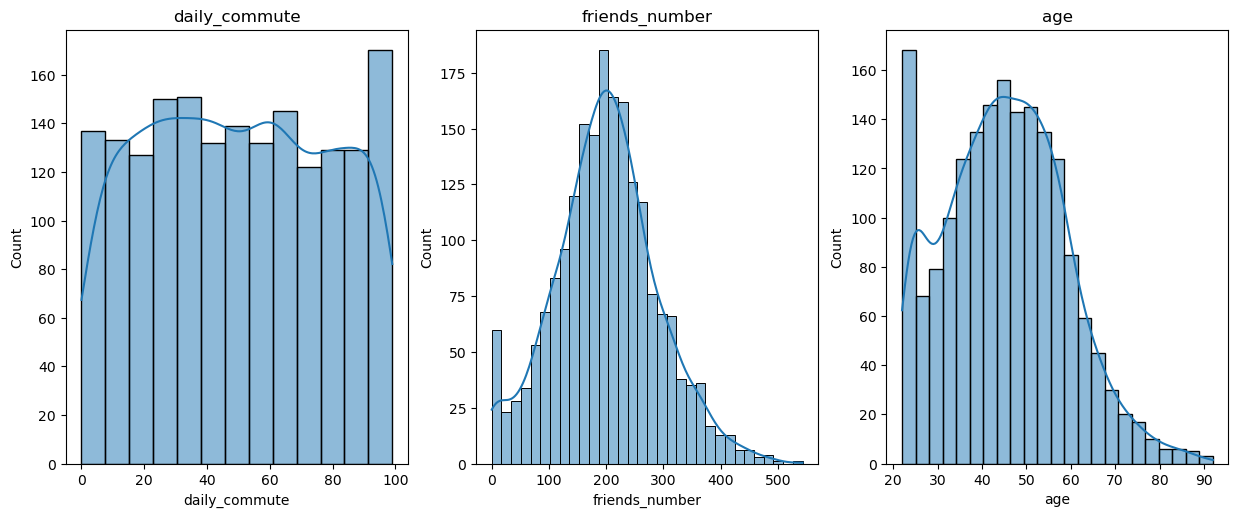

In [431]:
plt.figure(figsize=(15,80))
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(x = numerical_feature,data = df,kde=True)
    plt.title(numerical_feature)
    plotnumber+=1
plt.show()

In [432]:
selected_data =train[numerical_features]

In [433]:
knn_imputer = KNNImputer(n_neighbors = 5)
imputed_data = knn_imputer.fit_transform(selected_data)
imputed_df= pd.DataFrame(imputed_data, columns=numerical_features)

In [434]:
imputed_df

,daily_commute,friends_number,age
0,46.0,196.0,41.0
1,55.0,243.0,52.0
2,90.0,191.0,24.0
3,88.0,164.0,32.0
4,40.0,119.0,49.0
...,...,...,...
3995,1.0,126.0,39.0
3996,65.0,121.0,39.0
3997,79.0,140.0,58.0
3998,30.0,272.0,52.0


In [435]:
train[numerical_features] = imputed_df

In [436]:
train[numerical_features].isnull().sum()

daily_commute     0
friends_number    0
age               0
dtype: int64

In [437]:
#we can see that KNN didn't affect much statistic measures of numeric variables
train[numerical_features].describe().round()

,daily_commute,friends_number,age
count,4000.0,4000.0,4000.0
mean,50.0,200.0,45.0
std,28.0,90.0,13.0
min,0.0,0.0,22.0
25%,27.0,143.0,36.0
50%,50.0,199.0,45.0
75%,73.0,256.0,54.0
max,99.0,619.0,102.0


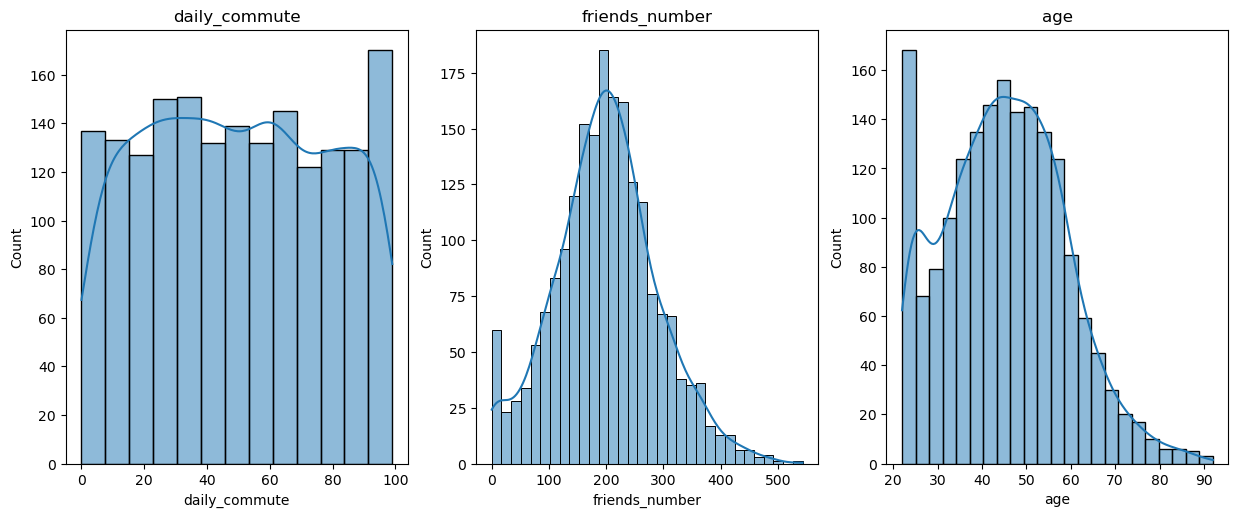

In [438]:
plt.figure(figsize=(15,80))
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(x = numerical_feature,data = df,kde=True)
    plt.title(numerical_feature)
    plotnumber+=1
plt.show()

# Categorical features - relationship_status, education, credit_card_type

In [439]:
categorical_features=['relationship_status', 'education', 'credit_card_type']

In [440]:
encoded_features = train[['relationship_status', 'credit_card_type']]

In [441]:
train.head()

,user_id,target,name,sex,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age,location_type,location_from_type
0,0,1,Halina,female,Piastów,22732,Piastów,22732,Teaching professionals,Fitness,46.0,196.0,Single,NaN,Visa,4,41.0,2,2
1,1,0,Eustachy,male,Sokółka,18331,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243.0,Single,NaN,NaN,5,52.0,2,2
2,2,1,Egon,male,Łaskarzew,4879,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191.0,In relationship,3.0,NaN,4,24.0,2,2
3,3,0,Eulalia,female,Bydgoszcz,352313,Bydgoszcz,352313,Customer services clerks,Badminton,88.0,164.0,In relationship,3.0,Visa,3,32.0,4,4
4,4,0,Hilary,male,Osieczna,2322,Poznań,538633,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119.0,Married with kids,5.0,NaN,7,49.0,2,4


In [442]:
le = LabelEncoder()

for feature in encoded_features:
    print(feature)
    nonnull_indices = train[feature].notnull()
    nonnull_data = train.loc[nonnull_indices, feature]
    train.loc[nonnull_indices, feature] = le.fit_transform(nonnull_data)
    integer_mapping = {l: i for i, l in enumerate(le.classes_)}
    # Create integer mapping for the non-null data
    print(integer_mapping)
    print()


relationship_status
{'Divorced': 0, 'In relationship': 1, 'Married': 2, 'Married with kids': 3, 'Single': 4}

credit_card_type
{'American Express': 0, 'Mastercard': 1, 'Revolut': 2, 'Visa': 3}



In [443]:
train['relationship_status'].value_counts()

1    1247
2     830
3     749
4     585
0     196
Name: relationship_status, dtype: int64

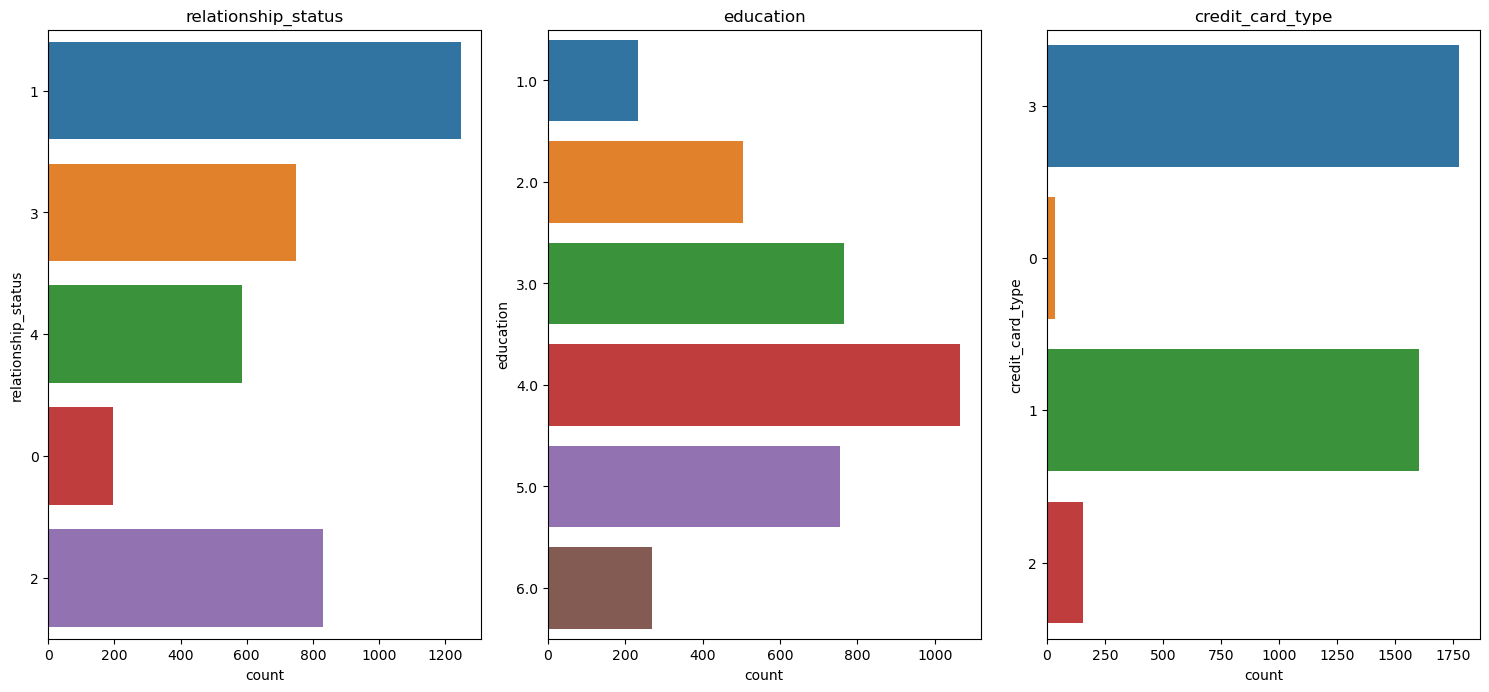

In [444]:
plt.figure(figsize=(15,80))
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y = categorical_feature,data = train)
    plt.title(categorical_feature)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [445]:
selected_data = train[categorical_features]
knn_imputer = KNNImputer(n_neighbors = 5)
imputed_data = np.round(knn_imputer.fit_transform(selected_data))
imputed_df= pd.DataFrame(imputed_data, columns=categorical_features)
imputed_df

,relationship_status,education,credit_card_type
0,4.0,3.0,3.0
1,4.0,4.0,2.0
2,1.0,3.0,2.0
3,1.0,3.0,3.0
4,3.0,5.0,2.0
...,...,...,...
3995,2.0,5.0,1.0
3996,4.0,2.0,3.0
3997,4.0,4.0,3.0
3998,0.0,6.0,1.0


In [446]:
imputed_df['relationship_status'].value_counts()

1.0    1302
2.0    1073
3.0     844
4.0     585
0.0     196
Name: relationship_status, dtype: int64

In [447]:
train[categorical_features] = imputed_df

In [448]:
train[categorical_features].describe().round()

,relationship_status,education,credit_card_type
count,4000.0,4000.0,4000.0
mean,2.0,4.0,2.0
std,1.0,1.0,1.0
min,0.0,1.0,0.0
25%,1.0,3.0,1.0
50%,2.0,4.0,2.0
75%,3.0,5.0,3.0
max,4.0,6.0,3.0


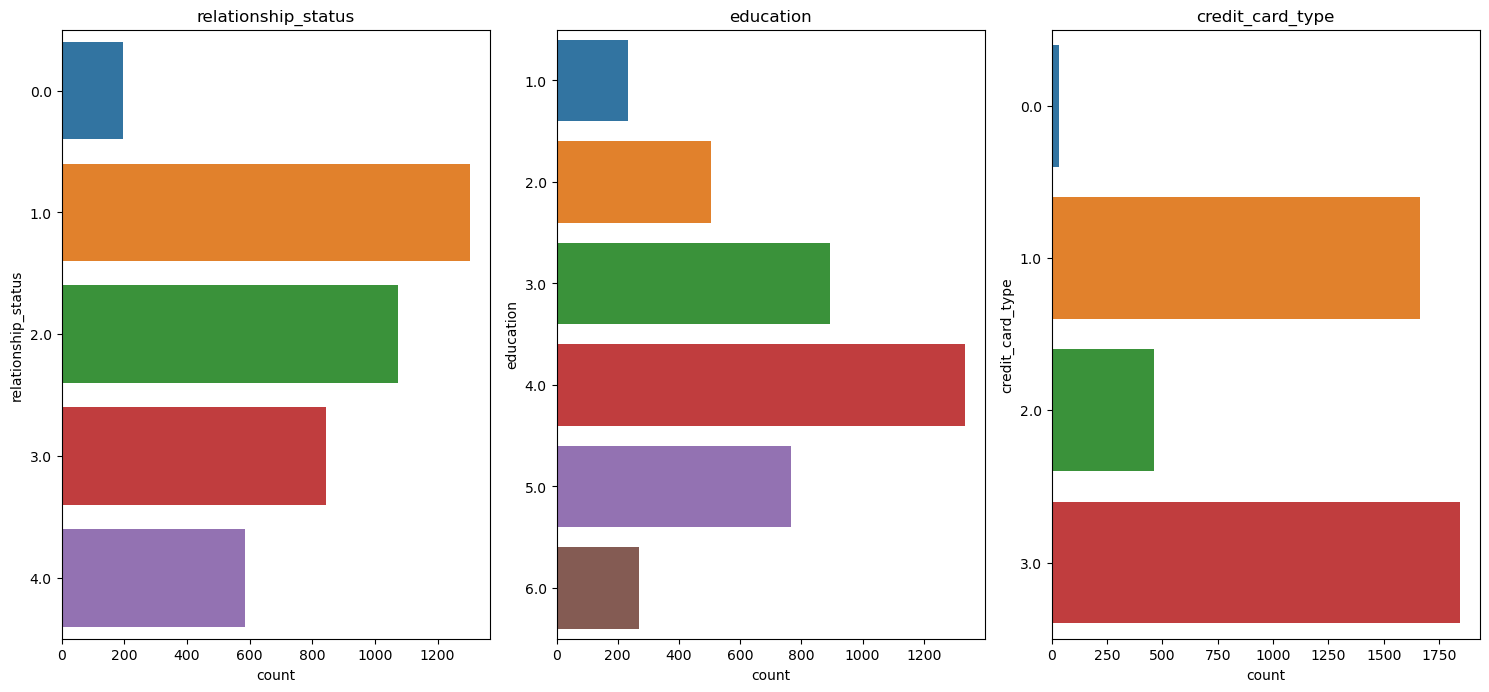

In [449]:
plt.figure(figsize=(15,80))
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y = categorical_feature,data = train)
    plt.title(categorical_feature)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [450]:
train.hobbies.value_counts()

Gym                                                20
Cardio                                             18
Squash                                             17
Bodybuilding                                       16
Stretching                                         15
                                                   ..
Board sports,Basketball,Hooping                     1
Fitness,Rowing,Handball,Candle making,Machining     1
Fitness,Creative writing                            1
Weightlifting,Fitness,Mycology,Kite flying          1
Crossfit,Digital arts,Cryptography                  1
Name: hobbies, Length: 2745, dtype: int64

# Handling Outliers

## boxplots and Z-Score Method

In [451]:
#checking outliers for few columns
outlier_check = ['daily_commute', 'friends_number', 'age']

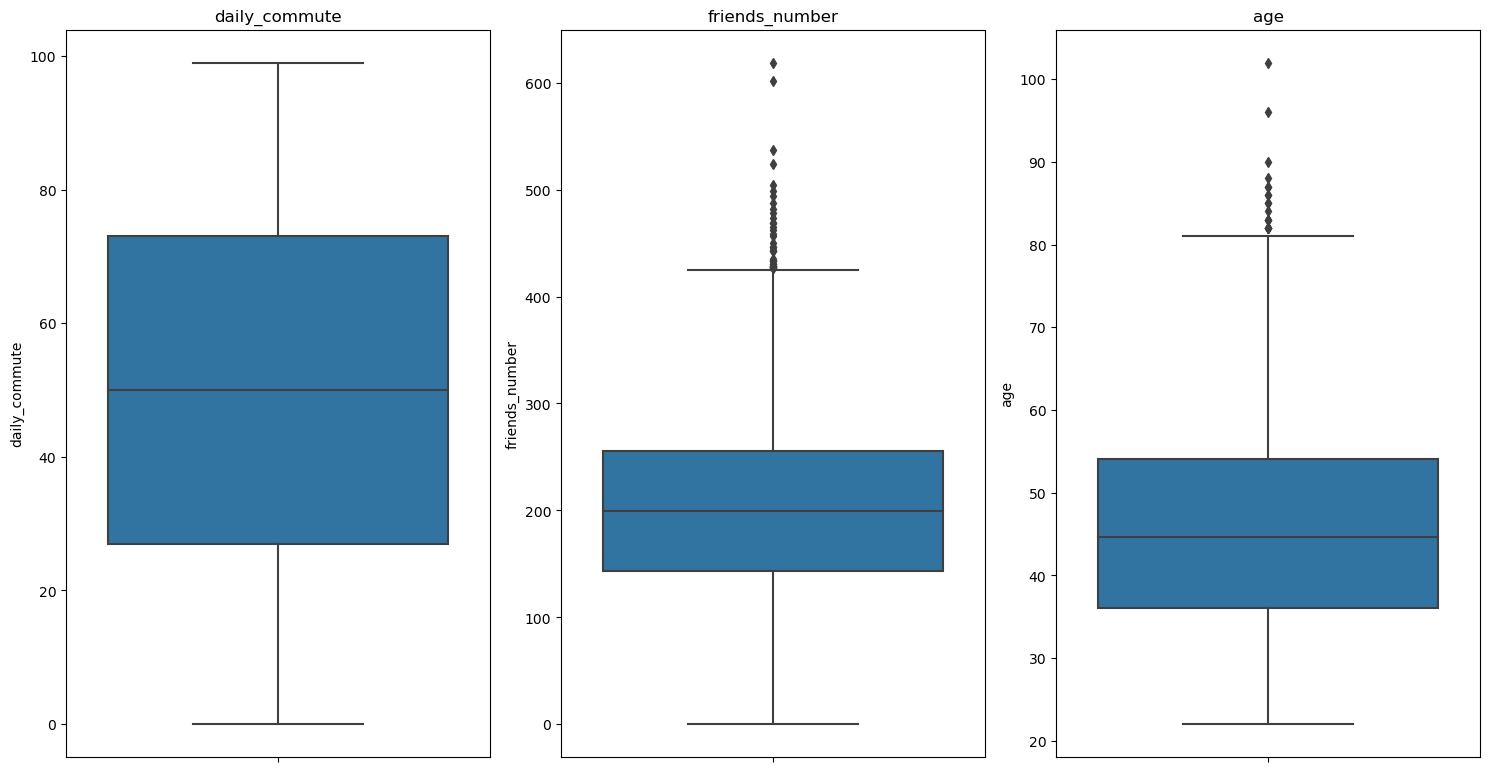

In [452]:
plt.figure(figsize=(15,90))
plotnumber = 1
for outliers in outlier_check:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(y = outliers, data = train)
    plt.title(outliers)
    plotnumber+=1
plt.tight_layout()
plt.show()

We can see that in friends_number and age have some outliers.

## Z-Score Method
Calculate the z-score for each data point and remove those that fall outside a certain threshold (e.g., z-score > 3 or < -3).

In [453]:
z_scores = stats.zscore(train[outlier_check])

In [454]:
z_scores 

,daily_commute,friends_number,age
0,-0.151959,-0.042856,-0.309302
1,0.173931,0.476575,0.536394
2,1.441281,-0.098114,-1.616287
3,1.368861,-0.396511,-1.001235
4,-0.369219,-0.893839,0.305750
...,...,...,...
3995,-1.781409,-0.816476,-0.463065
3996,0.536031,-0.871735,-0.463065
3997,1.042971,-0.661752,0.997683
3998,-0.731319,0.797075,0.536394


In [455]:
threshold = 3

In [456]:
age_z = z_scores[z_scores['age']>3]

In [457]:
#outliers for age column
train.loc[age_z.index, 'age']

376      96.0
833      86.0
1610     87.0
2043     85.0
2512    102.0
3035     88.0
3111     90.0
3269     87.0
3465     86.0
3612     85.0
Name: age, dtype: float64

In [458]:
friends_number_z = z_scores[z_scores['friends_number']>3]
#outliers for friends_number column
train.loc[friends_number_z.index, 'friends_number']

21      482.0
442     474.0
511     537.0
988     602.0
1123    619.0
2136    488.0
2262    504.0
2708    524.0
3299    499.0
3321    478.0
3357    494.0
Name: friends_number, dtype: float64

In [459]:
#no Outliers for daily commute
daily_commute_z = z_scores[z_scores['daily_commute']>3]
#outliers for friends_number column
train.loc[daily_commute_z.index, 'daily_commute']

Series([], Name: daily_commute, dtype: float64)

In [460]:
train.drop(age_z.index , axis=0, inplace=True)

In [461]:
train.drop(friends_number_z.index , axis=0, inplace=True)

In [462]:
train.shape

(3979, 19)

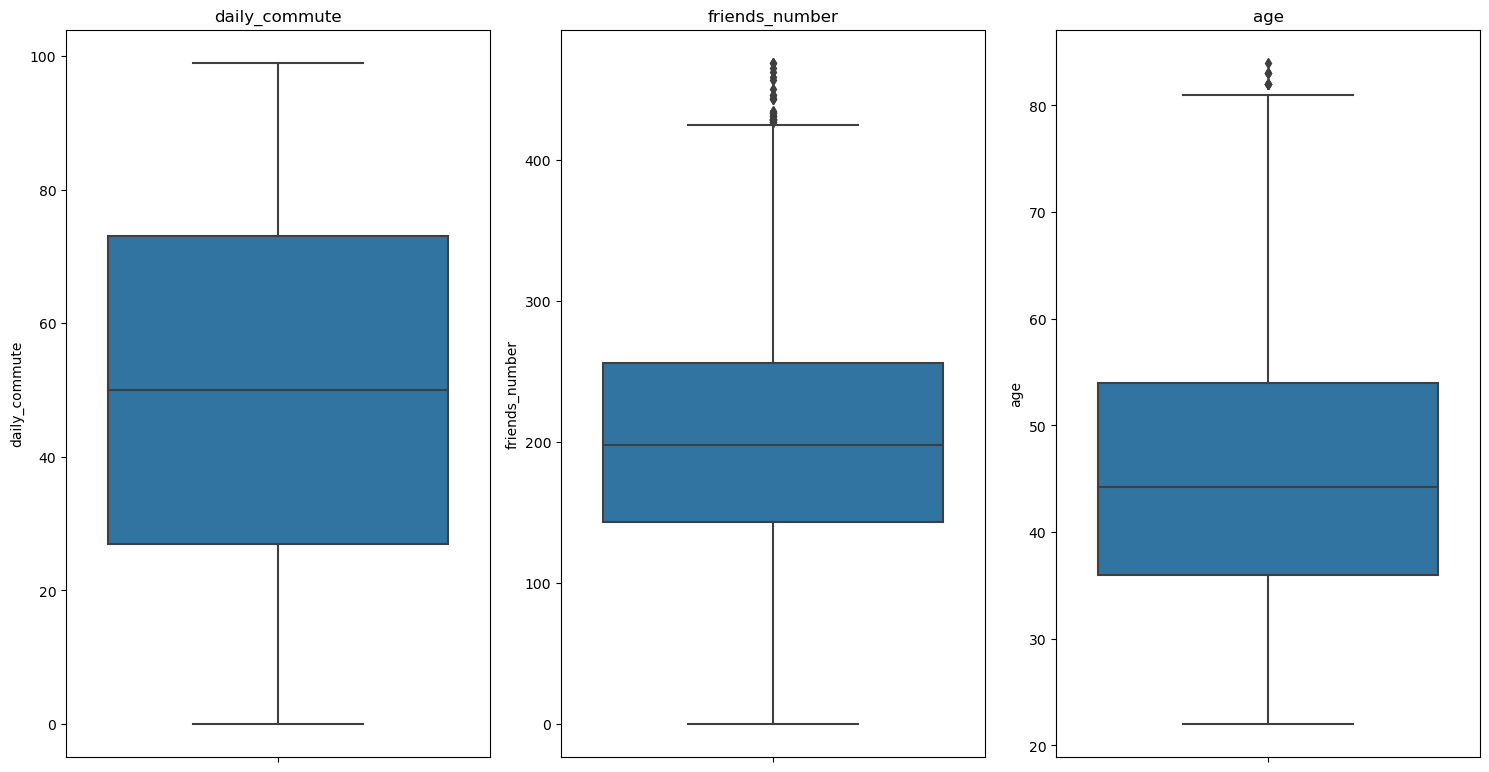

In [463]:
plt.figure(figsize=(15,90))
plotnumber = 1
for outliers in outlier_check:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(y = outliers, data = train)
    plt.title(outliers)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Review and visualization of data

In [464]:
train1 = train[train['target'] == 1]
train0 = train[train['target'] == 0]

In [465]:
train1.columns.max()

'user_id'

In [466]:
train0.describe().round()

,user_id,target,location_population,location_from_population,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age
count,3173.0,3173.0,3173.0,3173.0,3173.0,3173.0,3173.0,3173.0,3173.0,3173.0,3173.0
mean,1988.0,0.0,287487.0,292021.0,50.0,200.0,2.0,4.0,2.0,4.0,46.0
std,1151.0,0.0,464982.0,471090.0,27.0,97.0,1.0,1.0,1.0,2.0,13.0
min,1.0,0.0,786.0,1031.0,0.0,0.0,0.0,1.0,0.0,0.0,22.0
25%,985.0,0.0,23809.0,25533.0,27.0,130.0,1.0,3.0,1.0,3.0,37.0
50%,1994.0,0.0,73791.0,74834.0,50.0,200.0,2.0,4.0,2.0,4.0,46.0
75%,2966.0,0.0,339850.0,339850.0,73.0,268.0,3.0,5.0,3.0,5.0,55.0
max,3998.0,0.0,1764615.0,1764615.0,99.0,469.0,4.0,6.0,3.0,9.0,84.0


In [467]:
train1.describe().round()

,user_id,target,location_population,location_from_population,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age
count,806.0,806.0,806.0,806.0,806.0,806.0,806.0,806.0,806.0,806.0,806.0
mean,2044.0,1.0,400342.0,287104.0,50.0,197.0,2.0,4.0,2.0,6.0,39.0
std,1168.0,0.0,559845.0,476282.0,28.0,41.0,1.0,1.0,1.0,2.0,12.0
min,0.0,1.0,1391.0,1391.0,0.0,73.0,0.0,1.0,0.0,1.0,22.0
25%,1067.0,1.0,30207.0,21534.0,27.0,171.0,1.0,3.0,1.0,4.0,28.0
50%,2016.0,1.0,113621.0,65088.0,50.0,196.0,2.0,4.0,2.0,5.0,38.0
75%,3109.0,1.0,638586.0,339850.0,74.0,226.0,4.0,5.0,3.0,7.0,47.0
max,3999.0,1.0,1764615.0,1764615.0,99.0,328.0,4.0,6.0,3.0,11.0,79.0


In [468]:
train_summary = train.groupby('target')
train_summary.mean().round()

C:\Users\kasia\AppData\Local\Temp\ipykernel_29640\1986197637.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_summary.mean().round()


,user_id,location_population,location_from_population,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age
target,,,,,,,,,,
0,1988.0,287487.0,292021.0,50.0,200.0,2.0,4.0,2.0,4.0,46.0
1,2044.0,400342.0,287104.0,50.0,197.0,2.0,4.0,2.0,6.0,39.0


In [469]:
train.head(2)

,user_id,target,name,sex,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age,location_type,location_from_type
0,0,1,Halina,female,Piastów,22732,Piastów,22732,Teaching professionals,Fitness,46.0,196.0,4.0,3.0,3.0,4,41.0,2,2
1,1,0,Eustachy,male,Sokółka,18331,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243.0,4.0,4.0,2.0,5,52.0,2,2


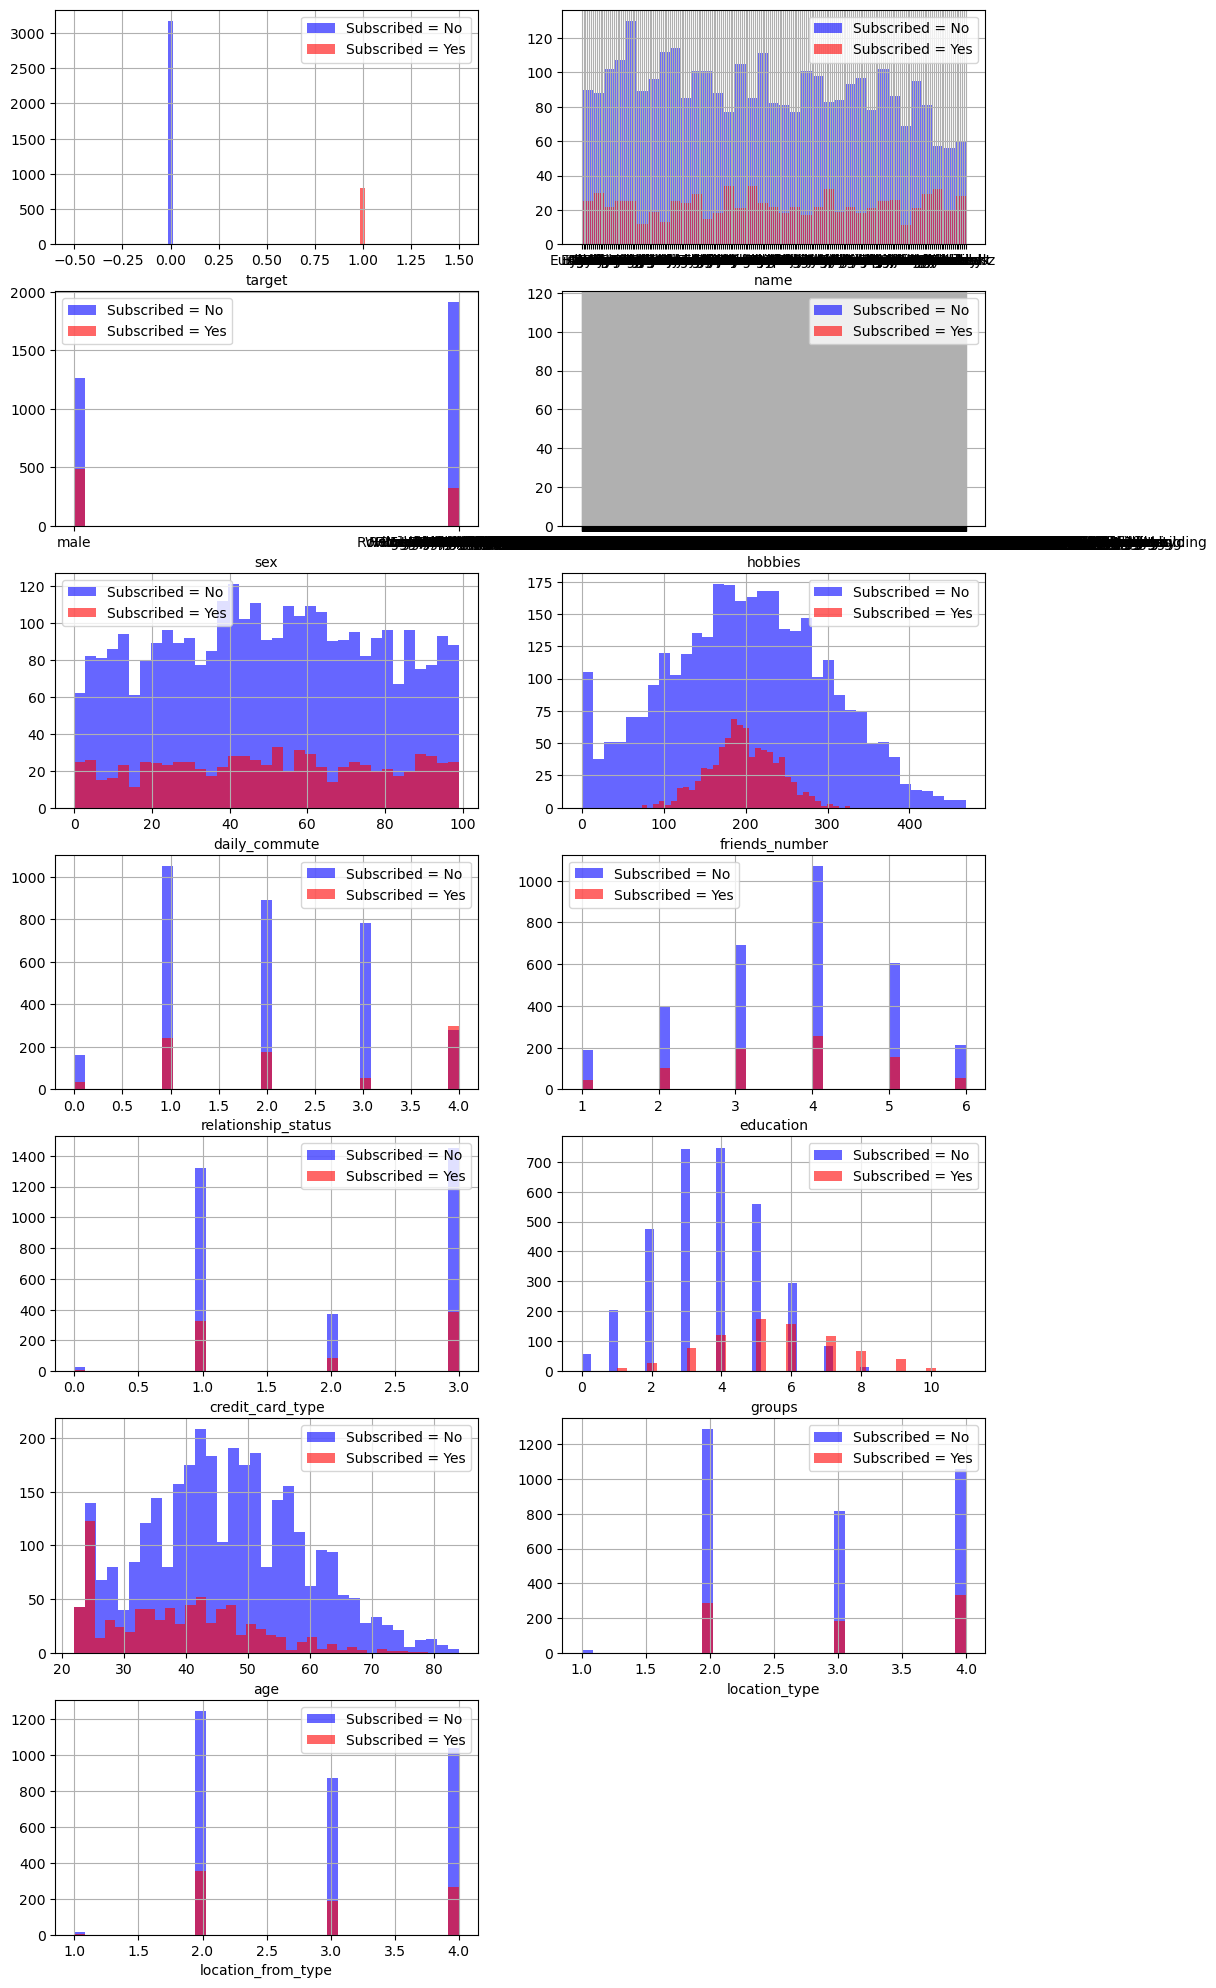

In [470]:
del_col = ['user_id', 'location', 'location_population', 'location_from_population', 'occupation', 'location_from']
columns = train.drop(del_col, axis=1).columns
plt.figure(figsize=(12, 25))

for i, column in enumerate(columns, 1):
    plt.subplot(7, 2, i)
    train[train["target"] == 0][column].hist(bins=35, color='blue', label='Subscribed = No', alpha=0.6)
    train[train["target"] == 1][column].hist(bins=35, color='red', label='Subscribed = Yes', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [471]:
train_summary.median()

C:\Users\kasia\AppData\Local\Temp\ipykernel_29640\3543411239.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_summary.median()


,user_id,location_population,location_from_population,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age
target,,,,,,,,,,
0,1994.0,73791.0,74834.0,50.0,200.0,2.0,4.0,2.0,4.0,46.0
1,2016.5,113621.0,65088.5,50.5,196.0,2.0,4.0,2.0,5.0,38.0


### Correlation

Based on below table and plt we can see that biggest impact on target have age and groups. Education, friens number and location from population have lowest correlation with target.

**Positive correlation:**

Users who joined more groups are more likely be interested in the long-term gym subscription. Also users from larger cities are more indicates higher interest.

**Negative correlation:**

Based on table and lot we can see that younger customers are more likely to subsribe

In [472]:
train.corr()

#no strong correlations between different variables. Strongest correlation is bwteeen location_from_population and location_population.
#meaning that many users didn't move to different city.

C:\Users\kasia\AppData\Local\Temp\ipykernel_29640\3844878316.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,user_id,target,location_population,location_from_population,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age
user_id,1.000000,0.019517,-0.008943,-0.025525,0.007685,0.020455,-0.004461,-0.039330,0.003371,-0.003167,-0.011144
target,0.019517,1.000000,0.093008,-0.004186,0.005080,-0.009838,0.152084,-0.001714,0.011991,0.414372,-0.243174
location_population,-0.008943,0.093008,1.000000,0.477286,0.009699,0.003291,0.027025,0.020391,0.003671,0.054473,-0.021051
location_from_population,-0.025525,-0.004186,0.477286,1.000000,-0.000834,0.011422,0.005112,0.028832,-0.003106,0.005446,-0.014688
daily_commute,0.007685,0.005080,0.009699,-0.000834,1.000000,-0.005888,0.008486,-0.022112,-0.000960,0.021582,0.020799
friends_number,0.020455,-0.009838,0.003291,0.011422,-0.005888,1.000000,0.028202,0.020349,0.027115,-0.015542,0.027733
relationship_status,-0.004461,0.152084,0.027025,0.005112,0.008486,0.028202,1.000000,-0.033102,0.030269,0.101747,-0.049702
education,-0.039330,-0.001714,0.020391,0.028832,-0.022112,0.020349,-0.033102,1.000000,0.029496,-0.015393,0.013425
credit_card_type,0.003371,0.011991,0.003671,-0.003106,-0.000960,0.027115,0.030269,0.029496,1.000000,0.021809,-0.005513
groups,-0.003167,0.414372,0.054473,0.005446,0.021582,-0.015542,0.101747,-0.015393,0.021809,1.000000,-0.106609


C:\Users\kasia\AppData\Local\Temp\ipykernel_29640\2413091789.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.drop('target', axis=1).corrwith(train.target).plot.bar(figsize = (18,8),


<Axes: title={'center': 'Correlation with response variable'}>

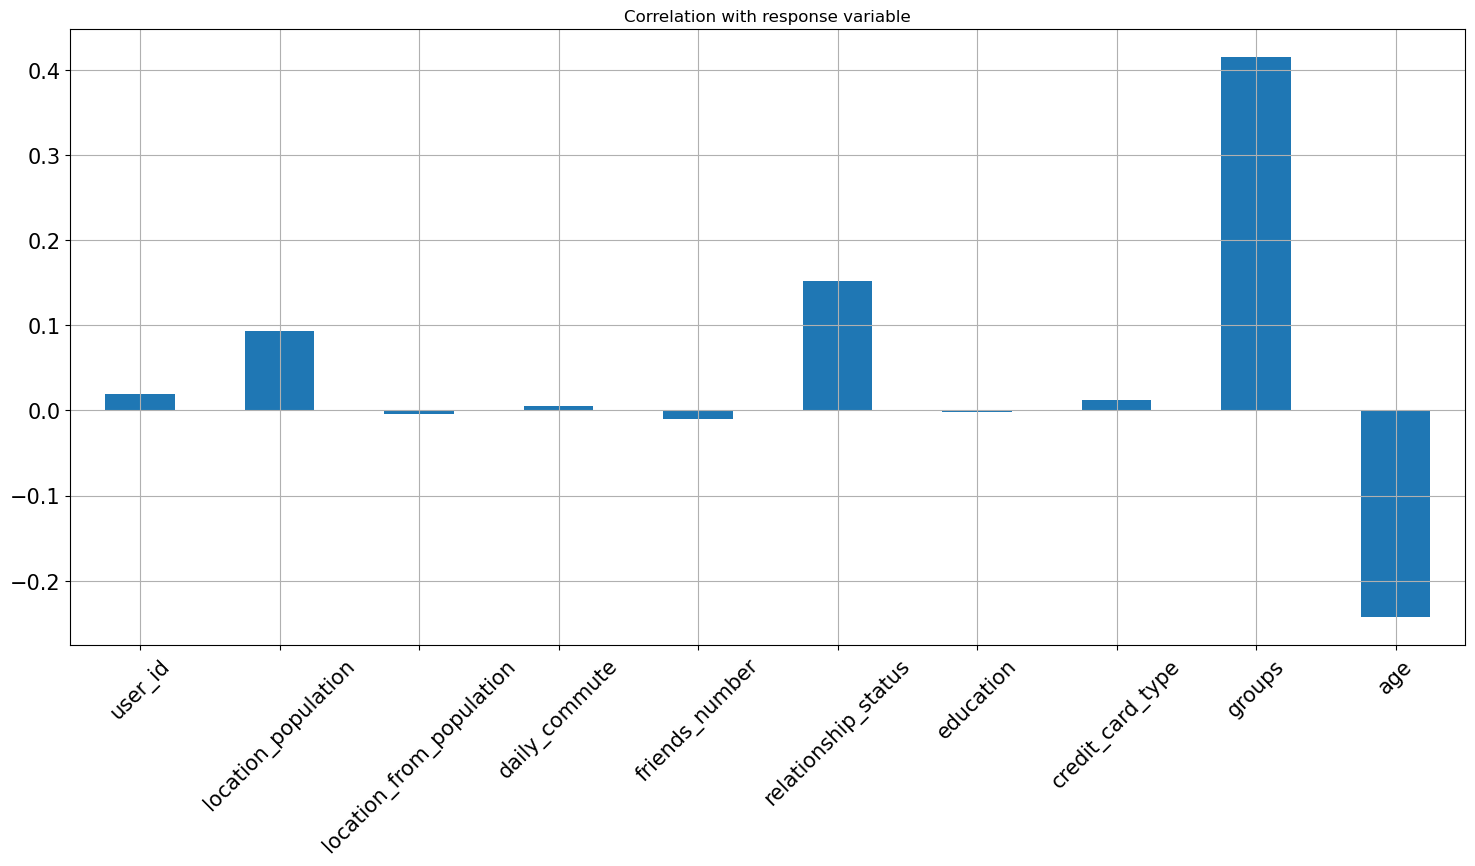

In [473]:
train.drop('target', axis=1).corrwith(train.target).plot.bar(figsize = (18,8),
                                                     title = 'Correlation with response variable',
                                                     fontsize = 15, rot = 45,
                                                     grid = True)

C:\Users\kasia\AppData\Local\Temp\ipykernel_29640\2057373253.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

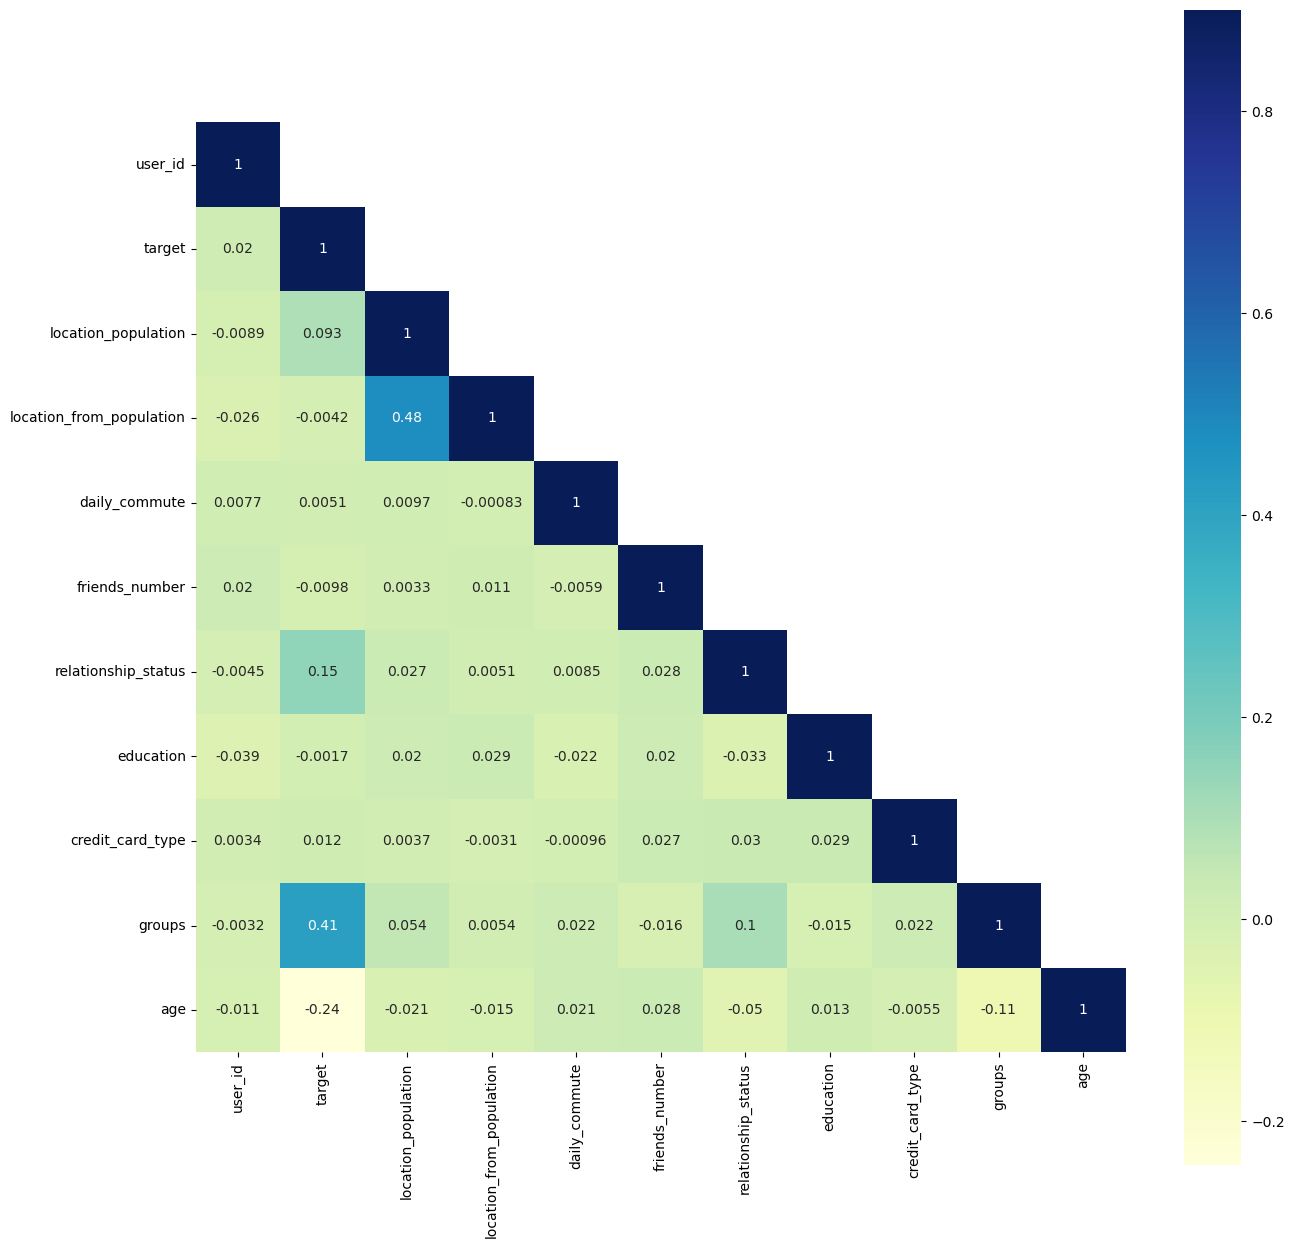

In [474]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [475]:
categorical_features = ['sex', 'relationship_status', 'credit_card_type', 'location_type', 'location_from_type', \
                        'education']

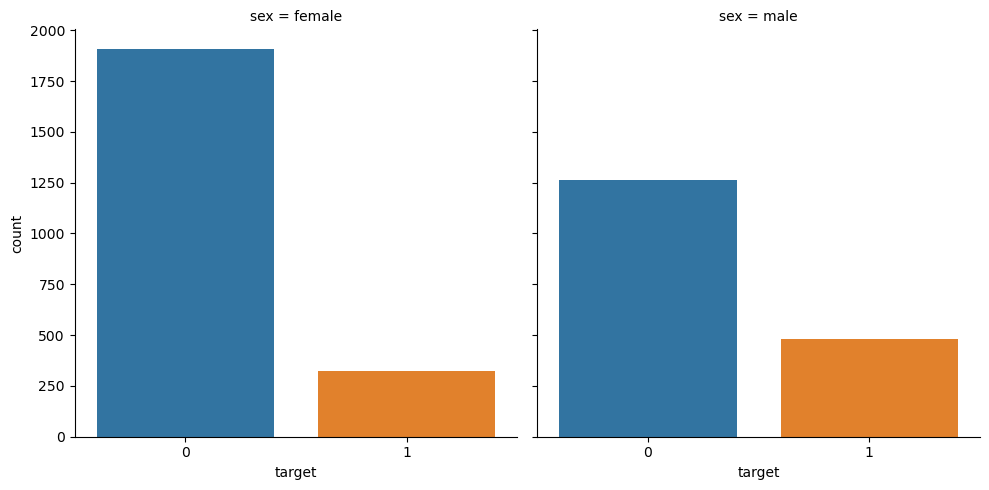

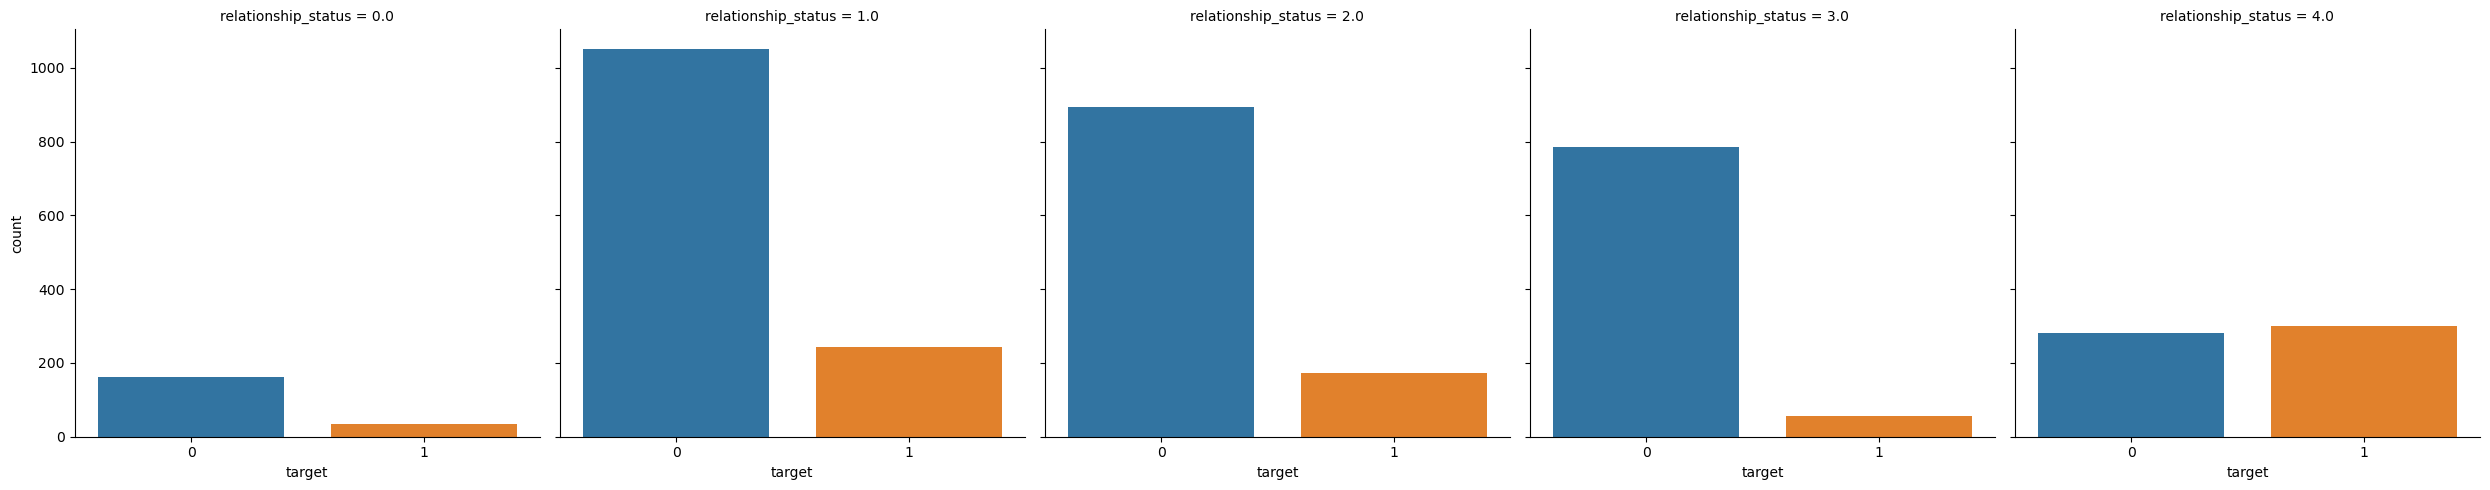

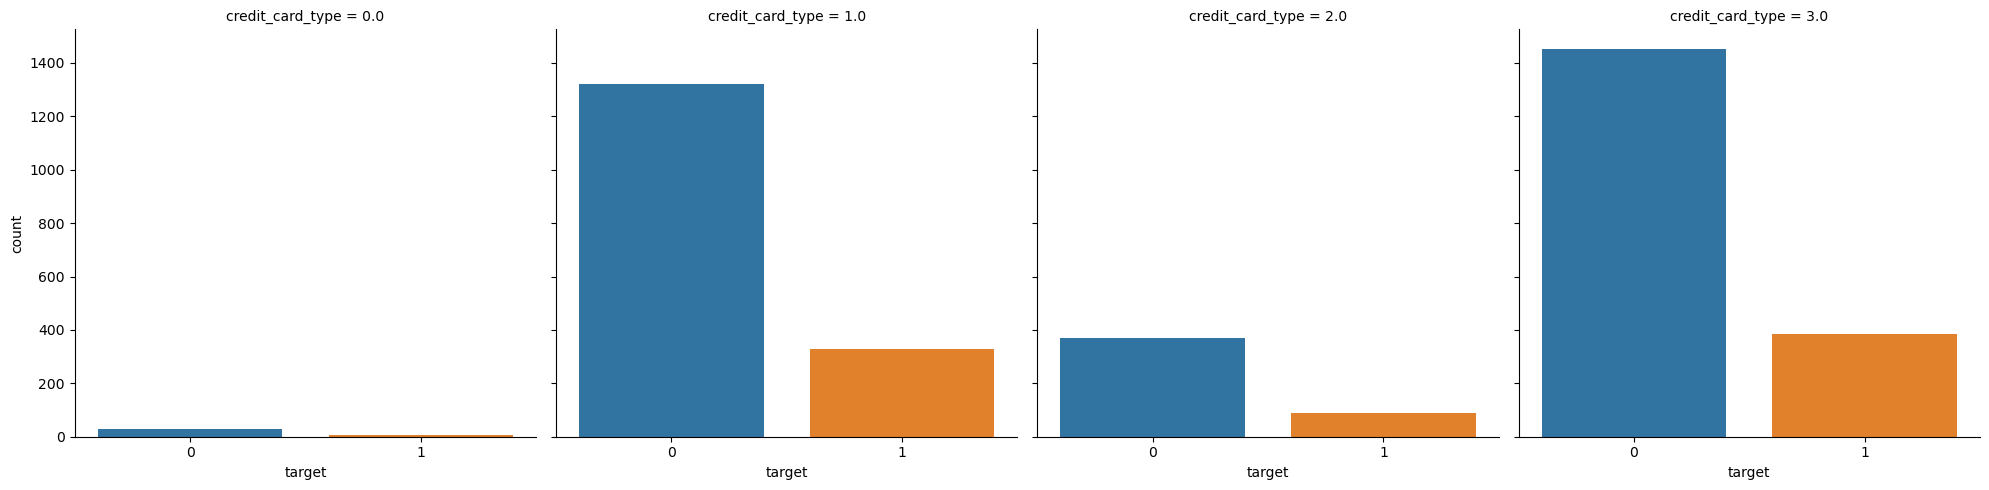

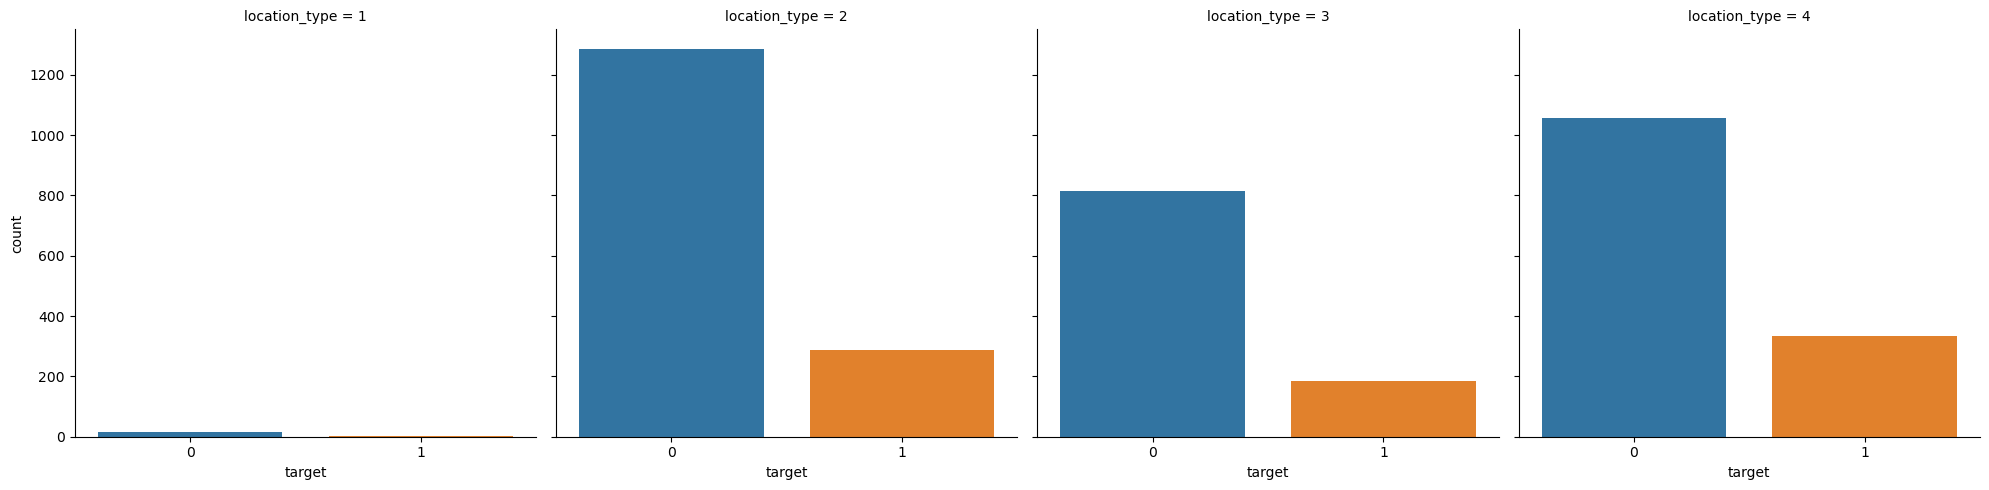

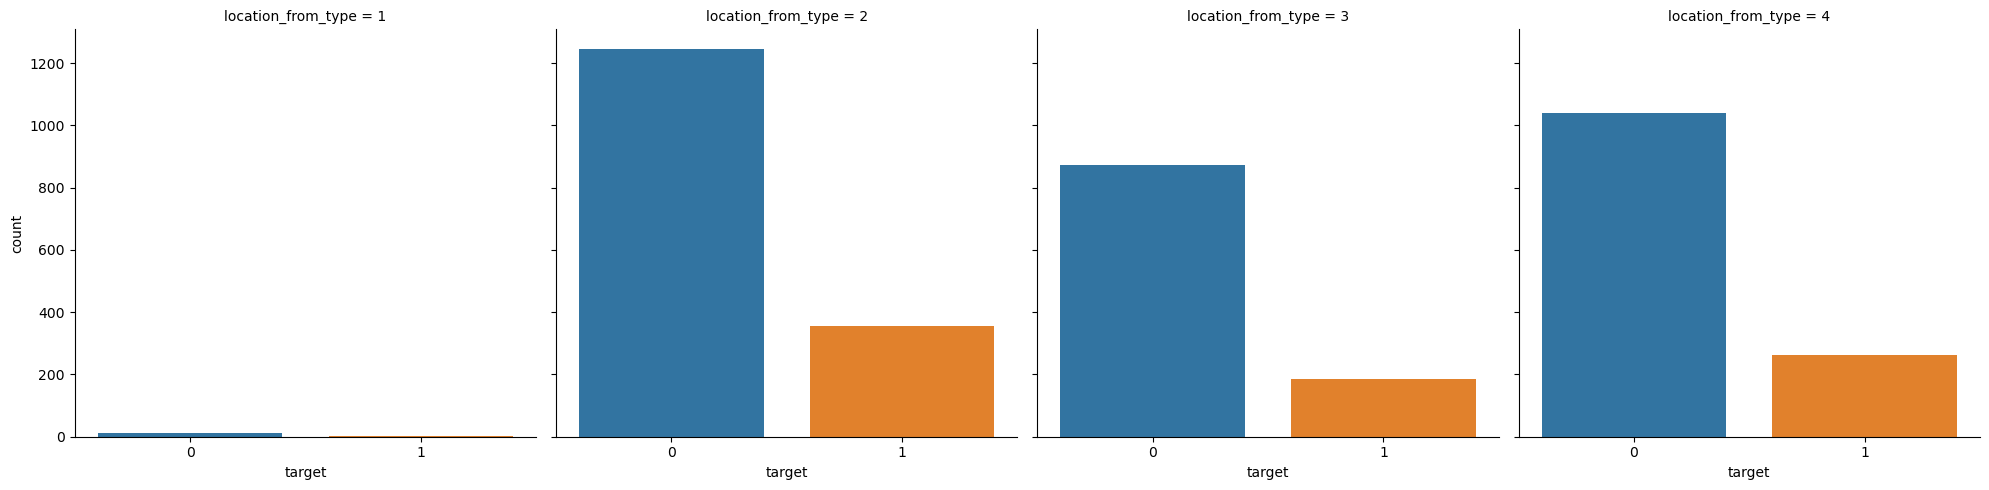

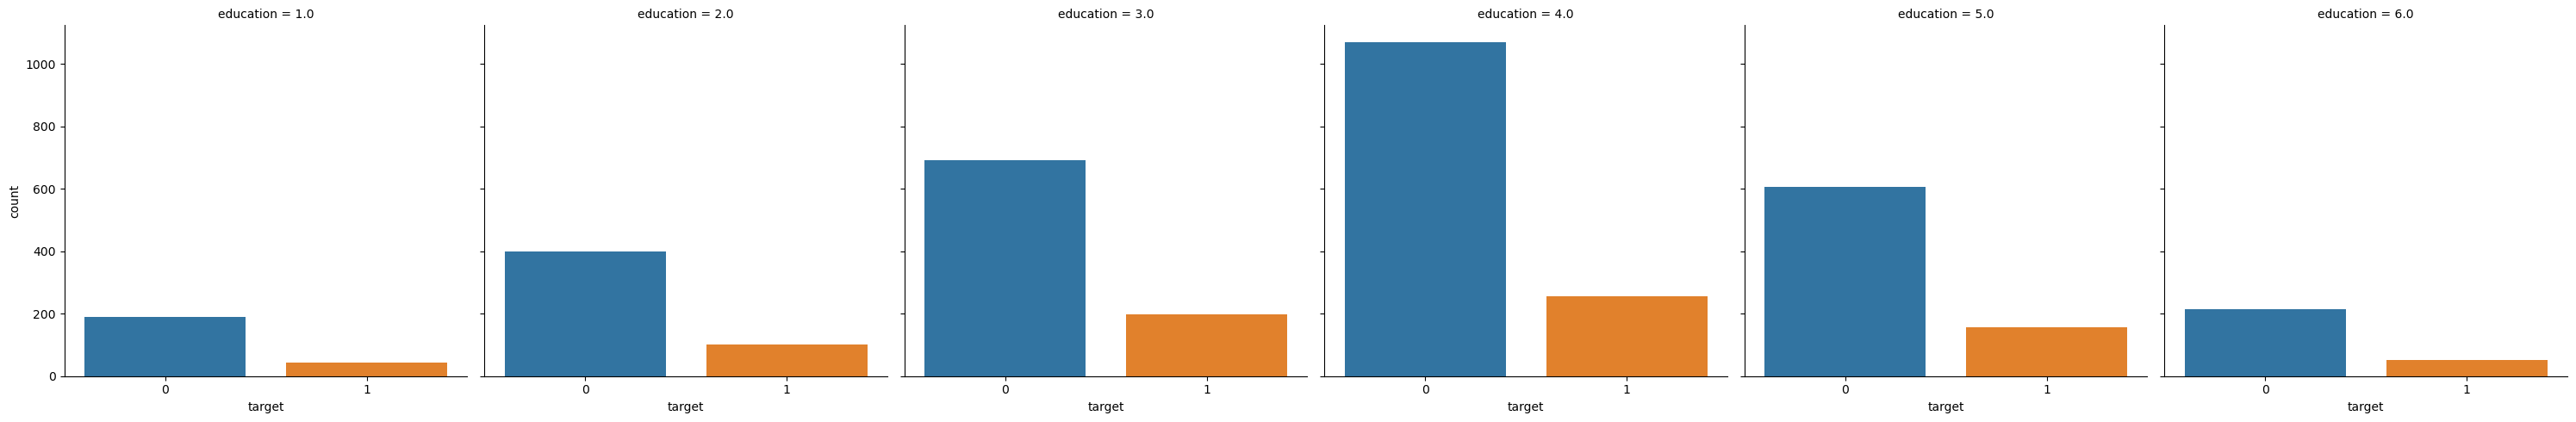

In [476]:
for categorical_feature in categorical_features:
    sns.catplot(x='target', col=categorical_feature, kind='count', data= train)
plt.show()

In [477]:
train0['occupation'].value_counts().head()

Science and engineering associate professionals                                      87
Health associate professionals                                                       86
Business and administration professionals                                            84
Food processing, wood working, garment and other craft and related trades workers    83
General and keyboard clerks                                                          83
Name: occupation, dtype: int64

In [478]:
train1['occupation'].value_counts().head()

Handicraft and printing workers                                28
Non-commissioned armed forces officers                         27
Refuse workers and other elementary workers                    25
Building and related trades workers, excluding electricians    24
Armed forces occupations, other ranks                          23
Name: occupation, dtype: int64

In [479]:
numerical_features=['daily_commute', 'friends_number', 'age']

In [480]:
train.head()

,user_id,target,name,sex,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age,location_type,location_from_type
0,0,1,Halina,female,Piastów,22732,Piastów,22732,Teaching professionals,Fitness,46.0,196.0,4.0,3.0,3.0,4,41.0,2,2
1,1,0,Eustachy,male,Sokółka,18331,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243.0,4.0,4.0,2.0,5,52.0,2,2
2,2,1,Egon,male,Łaskarzew,4879,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191.0,1.0,3.0,2.0,4,24.0,2,2
3,3,0,Eulalia,female,Bydgoszcz,352313,Bydgoszcz,352313,Customer services clerks,Badminton,88.0,164.0,1.0,3.0,3.0,3,32.0,4,4
4,4,0,Hilary,male,Osieczna,2322,Poznań,538633,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119.0,3.0,5.0,2.0,7,49.0,2,4


# Splitting hobby column/ dummy data

In [481]:
hobbies = train[['user_id', 'hobbies']]
hobbies.head(20)

,user_id,hobbies
0,0,Fitness
1,1,"LARPing,Foreign language learning,Netball"
2,2,"Bodybuilding,Kabaddi"
3,3,Badminton
4,4,"Fitness,Embroidery,Lacemaking"
5,5,"Rowing,Amateur radio,Sudoku"
6,6,"Gym,3D printing,Gaming,Flag Football"
7,7,"Crossfit,3D printing,Coloring,Hooping"
8,8,"Badminton,Listening to music"
9,9,Kettleballs


In [482]:

# Rozdzielamy hobby i tworzymy listę unikalnych hobby
hobbies['hobbies'] = hobbies['hobbies'].fillna('')
hobbies['hobbies'] = hobbies['hobbies'].str.split(',')
all_hobbies = sorted(set(hobby for sublist in hobbies['hobbies'] for hobby in sublist if hobby))

# Tworzymy nowy DataFrame z kolumnami dla każdego hobby
hobby_df = pd.DataFrame(0, index=hobbies['user_id'], columns=all_hobbies)


# Wypełniamy DataFrame odpowiednimi wartościami
for idx, row in hobbies.iterrows():
    for hobby in row['hobbies']:
        if hobby:
            hobby_df.at[row['user_id'], hobby] = 1

# Dodajemy kolumnę user_id
hobby_df = hobby_df.reset_index().rename(columns={'index': 'user_id'})

C:\Users\kasia\AppData\Local\Temp\ipykernel_29640\475034477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hobbies['hobbies'] = hobbies['hobbies'].fillna('')
C:\Users\kasia\AppData\Local\Temp\ipykernel_29640\475034477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hobbies['hobbies'] = hobbies['hobbies'].str.split(',')


In [483]:
hobby_df

,user_id,3D printing,Acting,Air sports,Amateur radio,Archery,Astronomy,BASE jumping,Backpacking,Badminton,...,Wood carving,Woodworking,Worldbuilding,Writing,Yo-yoing,Yoga,amateur radio,role-playing games,scrapbook,tabletop games
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,3995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3975,3996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3976,3997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3977,3998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [484]:
train.head()

,user_id,target,name,sex,location,location_population,location_from,location_from_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age,location_type,location_from_type
0,0,1,Halina,female,Piastów,22732,Piastów,22732,Teaching professionals,Fitness,46.0,196.0,4.0,3.0,3.0,4,41.0,2,2
1,1,0,Eustachy,male,Sokółka,18331,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243.0,4.0,4.0,2.0,5,52.0,2,2
2,2,1,Egon,male,Łaskarzew,4879,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191.0,1.0,3.0,2.0,4,24.0,2,2
3,3,0,Eulalia,female,Bydgoszcz,352313,Bydgoszcz,352313,Customer services clerks,Badminton,88.0,164.0,1.0,3.0,3.0,3,32.0,4,4
4,4,0,Hilary,male,Osieczna,2322,Poznań,538633,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119.0,3.0,5.0,2.0,7,49.0,2,4


In [488]:
train['occupation'].value_counts()

Science and engineering associate professionals                                      105
Health associate professionals                                                       104
Information and communications technicians                                           103
Food processing, wood working, garment and other craft and related trades workers    103
Information and communications technology professionals                              102
General and keyboard clerks                                                          102
Refuse workers and other elementary workers                                          101
Legal, social, cultural and related associate professionals                          100
Handicraft and printing workers                                                      100
Non-commissioned armed forces officers                                               100
Armed forces occupations, other ranks                                                100
Protective services w

# Removing columns - name and hobbies

In [485]:
# variable name won't be significant for data modelling and hobbies has too many missing values and data is very diverse and hard to fill
train.drop(['name', 'hobbies'], axis=1, inplace=True)

In [486]:
train.isnull().sum()

user_id                     0
target                      0
sex                         0
location                    0
location_population         0
location_from               0
location_from_population    0
occupation                  0
daily_commute               0
friends_number              0
relationship_status         0
education                   0
credit_card_type            0
groups                      0
age                         0
location_type               0
location_from_type          0
dtype: int64

In [487]:
train.head()

,user_id,target,sex,location,location_population,location_from,location_from_population,occupation,daily_commute,friends_number,relationship_status,education,credit_card_type,groups,age,location_type,location_from_type
0,0,1,female,Piastów,22732,Piastów,22732,Teaching professionals,46.0,196.0,4.0,3.0,3.0,4,41.0,2,2
1,1,0,male,Sokółka,18331,Sokółka,18331,General and keyboard clerks,55.0,243.0,4.0,4.0,2.0,5,52.0,2,2
2,2,1,male,Łaskarzew,4879,Łaskarzew,4879,Protective services workers,90.0,191.0,1.0,3.0,2.0,4,24.0,2,2
3,3,0,female,Bydgoszcz,352313,Bydgoszcz,352313,Customer services clerks,88.0,164.0,1.0,3.0,3.0,3,32.0,4,4
4,4,0,male,Osieczna,2322,Poznań,538633,Refuse workers and other elementary workers,40.0,119.0,3.0,5.0,2.0,7,49.0,2,4


# 4. Model Building - preparing data sets

In [195]:
train_data = train[['target', 'sex', 'occupation', 'daily_commute', 'friends_number', 'relationship_status', 'education', \
             'credit_card_type', 'age', 'location_type', 'location_from_type', 'groups']]
train_data

,target,sex,occupation,daily_commute,friends_number,relationship_status,education,credit_card_type,age,location_type,location_from_type,groups
0,1,female,Teaching professionals,46.0,196,Single,4.0,Visa,41.0,2,2,4
1,0,male,General and keyboard clerks,55.0,243,Single,4.0,Visa,52.0,2,2,5
2,1,male,Protective services workers,90.0,191,In relationship,3.0,Visa,23.0,2,2,4
3,0,female,Customer services clerks,88.0,164,In relationship,3.0,Visa,31.0,4,4,3
4,0,male,Refuse workers and other elementary workers,40.0,119,Married with kids,5.0,Visa,48.0,2,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3304,0,female,Protective services workers,62.0,161,In relationship,5.0,Visa,33.0,4,2,5
3305,0,female,Science and engineering associate professionals,59.0,271,Married,3.0,Visa,50.0,2,2,4
3306,1,female,Personal service workers,79.0,140,Single,4.0,Visa,57.0,3,2,6
3307,0,female,Handicraft and printing workers,30.0,272,Divorced,6.0,Mastercard,52.0,4,3,5


In [196]:
train_data.isnull().sum()

target                 0
sex                    0
occupation             0
daily_commute          0
friends_number         0
relationship_status    0
education              0
credit_card_type       0
age                    0
location_type          0
location_from_type     0
groups                 0
dtype: int64

In [197]:
#categorical variable
cat_var = ['sex', 'occupation', 'relationship_status', 'credit_card_type']

In [198]:
le = LabelEncoder()

for feature in cat_var:
    print(feature)
    train_data[feature] = le.fit_transform( train_data[feature])
    integer_mapping = {l: i for i, l in enumerate(le.classes_)}
    print(integer_mapping)
    print()

sex
{'female': 0, 'male': 1}

occupation
{'Administrative and commercial managers': 0, 'Agricultural, forestry and fishery labourers': 1, 'Armed forces occupations, other ranks': 2, 'Assemblers': 3, 'Building and related trades workers, excluding electricians': 4, 'Business and administration associate professionals': 5, 'Business and administration professionals': 6, 'Chief executives, senior officials and legislators': 7, 'Cleaners and helpers': 8, 'Commissioned armed forces officers': 9, 'Customer services clerks': 10, 'Drivers and mobile plant operators': 11, 'Electrical and electronic trades workers': 12, 'Food preparation assistants': 13, 'Food processing, wood working, garment and other craft and related trades workers': 14, 'General and keyboard clerks': 15, 'Handicraft and printing workers': 16, 'Health associate professionals': 17, 'Health professionals': 18, 'Hospitality, retail and other services managers': 19, 'Information and communications technicians': 20, 'Information 

C:\Users\kasia\AppData\Local\Temp\ipykernel_41952\2259974297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[feature] = le.fit_transform( train_data[feature])
C:\Users\kasia\AppData\Local\Temp\ipykernel_41952\2259974297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[feature] = le.fit_transform( train_data[feature])
C:\Users\kasia\AppData\Local\Temp\ipykernel_41952\2259974297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [199]:
train_data

,target,sex,occupation,daily_commute,friends_number,relationship_status,education,credit_card_type,age,location_type,location_from_type,groups
0,1,0,42,46.0,196,4,4.0,3,41.0,2,2,4
1,0,1,15,55.0,243,4,4.0,3,52.0,2,2,5
2,1,1,34,90.0,191,1,3.0,3,23.0,2,2,4
3,0,0,10,88.0,164,1,3.0,3,31.0,4,4,3
4,0,1,35,40.0,119,3,5.0,3,48.0,2,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3304,0,0,34,62.0,161,1,5.0,3,33.0,4,2,5
3305,0,0,37,59.0,271,2,3.0,3,50.0,2,2,4
3306,1,0,32,79.0,140,4,4.0,3,57.0,3,2,6
3307,0,0,16,30.0,272,0,6.0,1,52.0,4,3,5


In [200]:
labels = train_data['target']

In [201]:
train_data = train_data.drop(['target'],axis = 1)

In [202]:
labels

0       1
1       0
2       1
3       0
4       0
       ..
3304    0
3305    0
3306    1
3307    0
3308    1
Name: target, Length: 3309, dtype: int64

# 5.  a) Logistic Regression

In [203]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [204]:
lr = LogisticRegression()

In [205]:
X = np.asarray(train_data)
X[0:5]

array([[  0.,  42.,  46., 196.,   4.,   4.,   3.,  41.,   2.,   2.,   4.],
       [  1.,  15.,  55., 243.,   4.,   4.,   3.,  52.,   2.,   2.,   5.],
       [  1.,  34.,  90., 191.,   1.,   3.,   3.,  23.,   2.,   2.,   4.],
       [  0.,  10.,  88., 164.,   1.,   3.,   3.,  31.,   4.,   4.,   3.],
       [  1.,  35.,  40., 119.,   3.,   5.,   3.,  48.,   2.,   4.,   7.]])

In [206]:
y = np.asarray(labels)
y

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [207]:
#normalize the dataset:
#from sklearn import preprocessing
#X = preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

## Split dataset into training and test set

In [208]:
X_train, x_test, Y_train, y_test = train_test_split( X, y,test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2647, 11) (2647,)
Test set: (662, 11) (662,)


In [209]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [210]:
prediction = LR.predict(x_test)

In [211]:
# predict_proba returns estimates for all classes, ordered by the label of classes
prediction_prob = LR.predict_proba(x_test)
prediction_prob

array([[0.82086939, 0.17913061],
       [0.3382957 , 0.6617043 ],
       [0.83232918, 0.16767082],
       ...,
       [0.42191577, 0.57808423],
       [0.81952324, 0.18047676],
       [0.80791727, 0.19208273]])

## Evaluation of logistic model

Checking jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [212]:
jaccard_score(y_test, prediction ,pos_label=0)

0.8105436573311368

In [213]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, prediction, labels=[1,0]))

[[ 55  89]
 [ 26 492]]


Confusion matrix, without normalization
[[ 55  89]
 [ 26 492]]


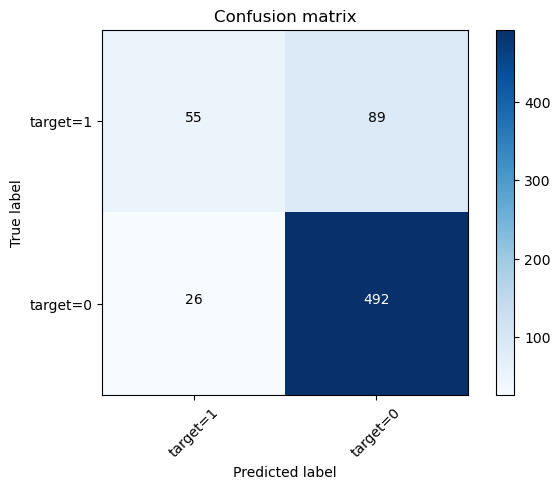

In [214]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix')


Based on matrix we can see that there are:
- 492 true negatives
- 55 true positives
- 89 false negatives
- 26 false positives

In [215]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       518
           1       0.68      0.38      0.49       144

    accuracy                           0.83       662
   macro avg       0.76      0.67      0.69       662
weighted avg       0.81      0.83      0.81       662



Precision is a measure of the accuracy provided that a class label has been predicted. 

Recall is the true positive rate.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

## log loss
 Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [216]:
log_loss(y_test, prediction_prob)

0.40680032659114806

In [217]:
Xlog = sm.add_constant(train_data) 
logr_model = sm.Logit(labels, Xlog)


In [218]:
#checking which columns are not important to establish probablity
logr_fit = logr_model.fit()
print(logr_fit.pvalues > 0.05)

Optimization terminated successfully.
         Current function value: 0.378003
         Iterations 7
const                  False
sex                    False
occupation              True
daily_commute           True
friends_number          True
relationship_status    False
education               True
credit_card_type        True
age                    False
location_type          False
location_from_type     False
groups                 False
dtype: bool


We can see thta occupation, daily commute, friends number education and credit card type are not relevant for the model and are not good predictions. 

#  b) Making predictions on test dataframe using LR model

In [219]:
test_data = test[['target', 'sex', 'occupation', 'daily_commute', 'friends_number', 'relationship_status', 'education', \
             'credit_card_type', 'age', 'location_type', 'location_from_type', 'groups']]


In [220]:
le = LabelEncoder()

for feature in cat_var:
    print(feature)
    test_data[feature] = le.fit_transform( test_data[feature])
    integer_mapping = {l: i for i, l in enumerate(le.classes_)}
    print(integer_mapping)
    print()

sex
{'female': 0, 'male': 1}

occupation
{'Administrative and commercial managers': 0, 'Agricultural, forestry and fishery labourers': 1, 'Armed forces occupations, other ranks': 2, 'Assemblers': 3, 'Building and related trades workers, excluding electricians': 4, 'Business and administration associate professionals': 5, 'Business and administration professionals': 6, 'Chief executives, senior officials and legislators': 7, 'Cleaners and helpers': 8, 'Commissioned armed forces officers': 9, 'Customer services clerks': 10, 'Drivers and mobile plant operators': 11, 'Electrical and electronic trades workers': 12, 'Food preparation assistants': 13, 'Food processing, wood working, garment and other craft and related trades workers': 14, 'General and keyboard clerks': 15, 'Handicraft and printing workers': 16, 'Health associate professionals': 17, 'Health professionals': 18, 'Hospitality, retail and other services managers': 19, 'Information and communications technicians': 20, 'Information 

C:\Users\kasia\AppData\Local\Temp\ipykernel_41952\1329683192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[feature] = le.fit_transform( test_data[feature])
C:\Users\kasia\AppData\Local\Temp\ipykernel_41952\1329683192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[feature] = le.fit_transform( test_data[feature])
C:\Users\kasia\AppData\Local\Temp\ipykernel_41952\1329683192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [221]:
labels_t = test_data['target']

In [222]:
test_data = test_data.drop(['target'],axis = 1)

In [226]:
test_prediction = pd.DataFrame()

In [234]:
test_prediction['user_id'] = test['user_id']

In [235]:
test_prediction['prob']= LR.predict_proba(test_data)

C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [236]:
test_prediction['classification'] = LR.predict(test_data)

C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [239]:
test_prediction['classification'].value_counts()

0    1482
1     202
Name: classification, dtype: int64

In [238]:
test_prediction

,prob,classification,user_id
0,0.873810,0,0
1,0.327478,1,1
2,0.782689,0,2
3,0.258208,1,3
4,0.831858,0,4
...,...,...,...
1679,0.736561,0,1995
1680,0.421573,1,1996
1681,0.498448,1,1997
1682,0.446231,1,1998


##  Result of LR model on test data set
Based on logistic regression we can predit that from test data 1482 users won't be instered in subscription and 202 might be potentially interested. 

# 6. a) Building Decision Trees Classifier model

In [271]:
tree5 = DecisionTreeClassifier(max_depth=5, random_state=0)

In [272]:
tree5.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [273]:
predict = tree5.predict(x_test)

In [274]:
accuracy_score(y_test, predict)

0.8474320241691843

In [275]:
tree4 = DecisionTreeClassifier(max_depth=4, random_state=0) #tree

In [276]:
tree4.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [277]:
predict = tree4.predict(x_test)

In [278]:
accuracy_score(y_test, predict)

0.8383685800604229

In [279]:
#calculating accuracy for each depth

#we can see that highets accuracy is for depth 5

depth = [3, 4, 5, 6, 7]

for d in depth:
    tree = DecisionTreeClassifier(max_depth=d, random_state=0) #tree
    tree.fit(X_train,Y_train)
    predict = tree.predict(x_test)
    ac = accuracy_score(y_test, predict)
    print(ac)

0.8323262839879154
0.8383685800604229
0.8474320241691843
0.8489425981873112
0.8353474320241692


In [280]:
import sklearn.tree as tree

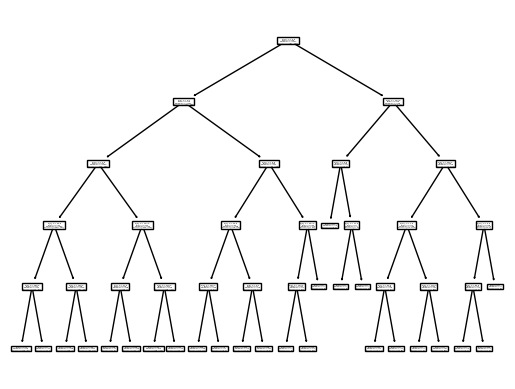

In [281]:
tree.plot_tree(tree5)
plt.show()

In [282]:
#checking the time of training
t0 = time.time()
tree5.fit(X_train, Y_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  0.09329


In [283]:
prediction_prob_tree = tree5.predict_proba(x_test)[:,1]

In [284]:
# Curve (ROC-AUC) score from the predictions
tree_roc_auc = roc_auc_score(y_test, prediction_prob_tree)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(tree_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.831


Confusion matrix, without normalization
[[ 80  64]
 [ 45 473]]


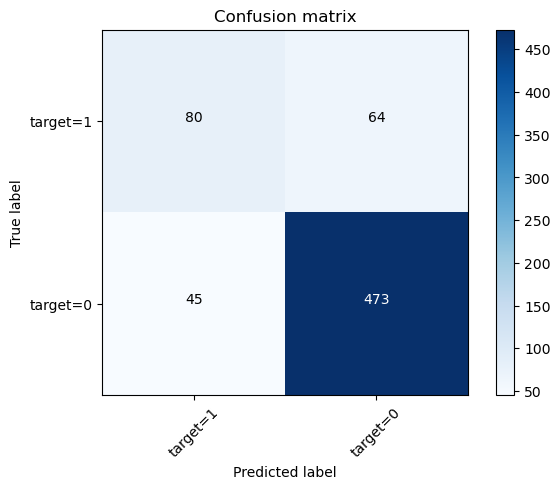

In [290]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix')


Based on matrix we can see that there are:
- 473 true negatives
- 80 true positives
- 64 false negatives
- 45 false positives

In [291]:
print (classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       518
           1       0.64      0.56      0.59       144

    accuracy                           0.84       662
   macro avg       0.76      0.73      0.75       662
weighted avg       0.83      0.84      0.83       662



# b)  Making predictions on test dataframe using Decision Tree model

In [263]:
test_prediction_tree = pd.DataFrame()

In [264]:
test_prediction_tree['user_id'] = test['user_id']

In [266]:
test_prediction_tree['prob']= tree5.predict_proba(test_data)[:,1]

C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [267]:
test_prediction_tree['classification'] = tree5.predict(test_data)

C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [268]:
test_prediction_tree

,user_id,prob,classification
0,0,0.347826,0
1,1,0.855556,1
2,2,0.358209,0
3,3,0.000000,0
4,4,0.070838,0
...,...,...,...
1679,1995,0.358209,0
1680,1996,0.561151,1
1681,1997,0.200000,0
1682,1998,0.358209,0


In [270]:
test_prediction_tree['classification'].value_counts()

0    1454
1     230
Name: classification, dtype: int64

##  Result of Decision Tree model on test data set
Based on logistic regression we can predit that from test data 1454 users won't be instered in subscription and 230 might be potentially interested. 

# 7. Summary

Best model to predict ineterst of subscription gives Decision Tree model. Below tables show that Classification Decision Tree model has better accuracy and can predict target better than logistic Regression Model.

Logistic Regression:

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       518
           1       0.68      0.38      0.49       144

    accuracy                           0.83       662
    macr avg       0.76      0.67      0.69       662
    weig avg       0.81      0.83      0.81       662


Decision Tree:

             precision    recall  f1-score   support

           0       0.88      0.91      0.90       518
           1       0.64      0.56      0.59       144

    accuracy                           0.84       662
    macr avg       0.76      0.73      0.75       662
    weigh avg      0.83      0.84      0.83       662

Based on analysis we can see that some veriable are not important for the model. Occupation, daily commute, friends number education and credit card type are not relevant for prediction.

Hobbies were not merged to training data set because of too many different values.

### Comparison of users interested in subscription and those who are not

With a quick look on below tables we can see some significant differances between two groups.

Customers who are interested in subscription are living in bigger cities (mean population is 403182), are younger (average age is 38. We can also see that many of them are from small cities but moved to bigger ones. They are more active in social media, join more amount of groups (avergae 6). Customers who could be more interetd interested are more likely to be Men are single. 

Top 5 occupation of customers who are intereted in subscription:
- Handicraft and printing workers                                25
- Non-commissioned armed forces officers                         25
- Building and related trades workers, excluding electricians    23
- Armed forces occupations, other ranks                          21
- Refuse workers and other elementary workers                    21



Customers who are not intereted are more likely to be from smaller cities and currently living also in smaller cities. Are older than those who are interetd in subscription (average age is 44). They join less groups (average is 4). Pople who are married with kids are least likely to subscribe. Also women are less interted than men. 

Top 5 occupation of customers who are not intereted in subscription:
- Business and administration professionals             76
- Health associate professionals                        75
- Chief executives, senior officials and legislators    71
- Science and engineering associate professionals       71
- General and keyboard clerks                           69